In [ ]:
!pip install lipd
!pip install cartopy
!pip install PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 87.5 MB/s eta 0:00:00
  Created wheel for lipd: filename=LiPD-0.2.8.9-py3-none-any.whl size=139951 sha256=fc69f86f8c9a312b2ec6521d16e9a3675941b0b95b1e2ae091c126dca9f35894
  Stored in directory: /root/.cache/pip/wheels/f2/f4/92/5eab343dd60cf0fcf7e7b27711076ac0ef1291474fd7da7c6a
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75281 sha256=df9a24a0fb79c84b69797b0ae5574dcc64d984ed91645571b7c2a8b54a8d37da
  Stored in directory: /root/.cache/pip/wheels/3b/9d/d5/e8cbb4d529989f6d3f347fe914559ea4f66715bf299763af1c
Successfully built lipd demjson3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import os
import lipd
import geopandas as gpd
from shapely.geometry import Point
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set directory to a specific folder in Google Drive
os.chdir('/content/drive/MyDrive/FYP/iso2k')  # replace 'your_folder' with your folder name

# Confirm the directory change
print("Current Working Directory:", os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current Working Directory: /content/drive/MyDrive/FYP/iso2k


In [ ]:
# Load the file from the current directory
with open('iso2k1_0_0.pkl', 'rb') as pickles:
    iso2k = pickle.load(pickles)

print(type(iso2k))

# See the keys of the dictionary
print(iso2k.keys())

<class 'dict'>
dict_keys(['D', 'TS'])


In the Iso2k dataset:
*   D contains site-level data structured in the LiPD format, representing each dataset's raw structure. This variable includes multiple variables, such as stable isotope data, ancillary information, and chronological data.
*   TS provides a "flattened" version of the dataset, where each entry contains an individual time series along with its associated metadata, making it more accessible for querying and analysis.

Moving forward, we will use TS to do the analysis.

In [ ]:
print(type(iso2k['TS'][0]))
first_item = iso2k['TS'][1000]
print(first_item)

<class 'dict'>
{'mode': 'paleoData', 'time_id': 46.993016, 'archiveType': 'LakeSediment', 'createdBy': 'matlab', 'dataSetName': 'LS12GOBA', 'googleMetadataWorksheet': 'oervkmg', 'googleSpreadSheetKey': '1XMD_S7JxMi2vnT4BB4h1ObvVLuqY7gaoQZ6Vy45RTHc', 'hasPaleoDepth': 1, 'samplingMethod': 'Ostracods samples pretreated with 3% H2O2, then samples were split using a microsplitter.', 'tagMD5': '9794a978f0fe4efe4711dca6273ae6f0', 'lipdverseLink': 'http://lipdverse.org/iso2k/0_15_0/LS12GOBA.html', 'nUniqueAges': 0, 'archiveTypeOriginal': 'lake sediment', 'maxYear': 1815.6, 'minYear': -5480.8333, 'hasDepth': '1', 'hasChron': '0', 'originalDataUrl': 'this compilation', 'pub1_author': 'Gouramanis, C. , Dodson, J. , Wilkins, D. , De Deckker, P. , Chase, B.M.', 'pub1_journal': 'Quaternary Science Reviews', 'pub1_page': -17, 'pub1_pubDataUrl': 'doi.org', 'pub1_publisher': 'Elsevier BV', 'pub1_title': 'Holocene palaeoclimate and sea level fluctuation recorded from the coastal Barker Swamp, Rottnest I

TS is a list of dictionaries, with each dictionary representing a single record.

In [ ]:
# Search for the record with the specified UI
for record in iso2k['TS']:
    if record.get("paleoData_iso2kUI") == "IC07KARB01A":
        for key, value in record.items():
            print(f"{key}: {value}")
        break
else:
    print("Record with paleoData_iso2kUI 'TR12SAMU00' not found.")

mode: paleoData
time_id: 46.993016
archiveType: GlacierIce
createdBy: matlab
dataSetName: IC07KARB
googleMetadataWorksheet: okcgm1m
googleSpreadSheetKey: 10HVrC2HuGPxfoS6-zoL74_otg12YUo5LMAoFeMhnWLA
hasPaleoDepth: 1
tagMD5: f8837aa735639505152a495339654190
lipdverseLink: http://lipdverse.org/iso2k/0_15_0/IC07KARB.html
nUniqueAges: 0
archiveTypeOriginal: glacier ice
maxYear: 1997.5
minYear: 997.5
hasDepth: 1
hasChron: 0
originalDataUrl: https://www.ncdc.noaa.gov/paleo/study/6180
pub1_author: Kaspari
pub1_doi: 10.1029/2007GL030440
pub1_year: 2007
pub1_citation: Kaspari, S., Mayewski, P., Kang, S., Sneed, S., Hou, S., Hooke, R., Kreutz, K., Introne, D., Handley, M., Maasch, K., Qin, D. and Ren, J.: Reduction in northward incursions of the South Asian monsoon since ∼1400 AD inferred from a Mt. Everest ice core, Geophysical Research Letters, 34(16), doi:10.1029/2007gl030440, 2007.
geo_meanLon: 86.96
geo_meanLat: 28.03
geo_meanElev: 6518.0
geo_type: Point
geo_siteName: East Rongbuk Glacier
@

In [ ]:
ts_data = iso2k['TS']

# Extract 'variableGroup' from 'paleoData_interpretation' and add it as a new column
all_series_with_variable_group = []

for record in ts_data:
    if 'year' in record and 'paleoData_values' in record:
        # Extract 'variableGroup' from 'paleoData_interpretation' if it exists
        if 'paleoData_interpretation' in record:
            variable_groups = [
                interpretation.get('variableGroup', 'Unknown')
                for interpretation in record['paleoData_interpretation']
            ]
            variable_group = ', '.join(variable_groups) if variable_groups else 'Unknown'
        else:
            variable_group = 'Unknown'

        measurement_material_detail = record.get('paleoData_measurementMaterialDetail', 'Unknown')
        paleo_units = record.get('paleoData_units', 'Unknown')
        depth_values = record.get('depth', [np.nan] * len(record['year']))
        measurement_standard = record.get('paleoData_measurementStandard', 'Unknown')

        df = pd.DataFrame({
            'Year': record['year'],
            'Value': record['paleoData_values'],
            'archiveType': record.get('archiveType', 'Unknown'),
            'VariableName': record.get('paleoData_variableName', 'Unknown'),
            'Latitude': record.get('geo_meanLat', np.nan),
            'Longitude': record.get('geo_meanLon', np.nan),
            'PrimaryTimeSeries': record.get('paleoData_iso2kPrimaryTimeseries', 'FALSE'),
            'ID': record.get('paleoData_iso2kUI', 'Unknown'),
            'InferredMaterial': record.get('paleoData_inferredMaterial', 'Unknown'),
            'InferredMaterialGroup': record.get('paleoData_inferredMaterialGroup', 'Unknown'),
            'VariableGroup': variable_group,
            'MeasurementMaterialDetail': measurement_material_detail,
            'Depth': depth_values,
            'Units': paleo_units,
            'MeasurementStandard': measurement_standard
        })
        all_series_with_variable_group.append(df)

# Combine all the DataFrames into one
combined_df = pd.concat(all_series_with_variable_group)

# Drop rows where 'Year' or 'Value' is missing and clean up
combined_df.dropna(subset=['Year', 'Value'], inplace=True)
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')
combined_df.dropna(subset=['Year'], inplace=True)

print(combined_df.head())
print(combined_df.shape)

     Year  Value archiveType VariableName  Latitude  Longitude  \
0  1994.0 -4.705       Coral         d18O   -3.2556    40.1433   
1  1993.0 -4.658       Coral         d18O   -3.2556    40.1433   
2  1992.0 -4.664       Coral         d18O   -3.2556    40.1433   
3  1991.0 -4.627       Coral         d18O   -3.2556    40.1433   
4  1990.0 -4.598       Coral         d18O   -3.2556    40.1433   

  PrimaryTimeSeries           ID  InferredMaterial InferredMaterialGroup  \
0              TRUE  CO00COKY01A  surface seawater         surface water   
1              TRUE  CO00COKY01A  surface seawater         surface water   
2              TRUE  CO00COKY01A  surface seawater         surface water   
3              TRUE  CO00COKY01A  surface seawater         surface water   
4              TRUE  CO00COKY01A  surface seawater         surface water   

                                       VariableGroup  \
0  temperature and salinity, Temperature, Effecti...   
1  temperature and salinity, Tempe

In [ ]:
# Count the number of unique TSid
unique_id_count = combined_df['ID'].nunique()

print(f"Number of unique ID (records): {unique_id_count}")

Number of unique ID (records): 752


In [ ]:
# Define filtering criteria
lat_min, lat_max = -30, 30
lon_min, lon_max = 30, 180
target_variables = ['d18O', 'd2H']

# Apply filtering
filtered_df = combined_df[
    (combined_df['Latitude'] >= lat_min) &
    (combined_df['Latitude'] <= lat_max) &
    (combined_df['Longitude'] >= lon_min) &
    (combined_df['Longitude'] <= lon_max) &
    (combined_df['PrimaryTimeSeries'] == 'TRUE') &
    (combined_df['VariableName'].isin(target_variables)) &
    (combined_df['Year'] > 0)
].copy()


filtered_df['Value'] = pd.to_numeric(filtered_df['Value'], errors='coerce')
filtered_df.dropna(subset=['Value'], inplace=True)

# Sort filtered data by 'Year'
filtered_df = filtered_df.sort_values(by='Year')

print(filtered_df.head(5))
print(f"Number of records: {filtered_df['ID'].nunique()}")

        Year     Value     archiveType VariableName  Latitude  Longitude  \
110  1.66665  0.170000  MarineSediment         d18O    1.4000   119.0800   
110  1.66665 -2.990000  MarineSediment         d18O    1.4000   119.0800   
175  2.56200  0.333585    LakeSediment         d18O   19.9763    76.5077   
291  3.87000 -3.160000  MarineSediment         d18O   -3.5300   119.2000   
291  3.87000 -0.450000  MarineSediment         d18O   -3.5300   119.2000   

    PrimaryTimeSeries           ID  InferredMaterial InferredMaterialGroup  \
110              TRUE  MS11ANMN01b  surface seawater         surface water   
110              TRUE  MS11ANMN01a  surface seawater         surface water   
175              TRUE   LS14PRLO01        lake water         surface water   
291              TRUE  MS09DOIP01a  surface seawater         surface water   
291              TRUE  MS09DOIP01b  surface seawater         surface water   

                                         VariableGroup  \
110             

In [ ]:
# Exclude archiveType == 'corak' before grouping
filtered_excluded_df = filtered_df[filtered_df['archiveType'] != 'Coral']

# First groupby (archiveType)
variable_counts_by_archive = (
    filtered_excluded_df.groupby(['archiveType'])['ID']
    .nunique()
    .reset_index(name='UniqueIDCount')
)

print(variable_counts_by_archive)

# Second groupby (archiveType, VariableName)
variable_counts_by_archive = (
    filtered_excluded_df.groupby(['archiveType', 'VariableName'])['ID']
    .nunique()
    .reset_index(name='UniqueIDCount')
)

print(variable_counts_by_archive)


           archiveType  UniqueIDCount
0           GlacierIce              9
1         LakeSediment             14
2       MarineSediment             21
3           Speleothem              7
4  TerrestrialSediment              2
5                 Wood             21
           archiveType VariableName  UniqueIDCount
0           GlacierIce         d18O              8
1           GlacierIce          d2H              1
2         LakeSediment         d18O              9
3         LakeSediment          d2H              5
4       MarineSediment         d18O             20
5       MarineSediment          d2H              1
6           Speleothem         d18O              7
7  TerrestrialSediment          d2H              2
8                 Wood         d18O             21


In [ ]:
# Total unique IDs per archiveType (your existing code)
variable_counts_by_archive = (
    filtered_df.groupby(['archiveType'])['ID']
    .nunique()
    .reset_index(name='UniqueIDCount')
)

# Count how many unique records have Depth information per archiveType
depth_counts_by_archive = (
    filtered_df[filtered_df['Depth'].notna()]
    .groupby(['archiveType'])['ID']
    .nunique()
    .reset_index(name='HasDepthCount')
)

# Merge the two counts
combined_counts_by_archive = pd.merge(
    variable_counts_by_archive,
    depth_counts_by_archive,
    on='archiveType',
    how='left'
)

# Fill NaN with 0 where no records have depth
combined_counts_by_archive['HasDepthCount'] = combined_counts_by_archive['HasDepthCount'].fillna(0).astype(int)

# Print the result
print(combined_counts_by_archive)

           archiveType  UniqueIDCount  HasDepthCount
0                Coral             56              9
1           GlacierIce              9              7
2         LakeSediment             14             14
3       MarineSediment             21             21
4           Speleothem              7              5
5  TerrestrialSediment              2              2
6                 Wood             21              0


<ipython-input-11-302273cf67ac>:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


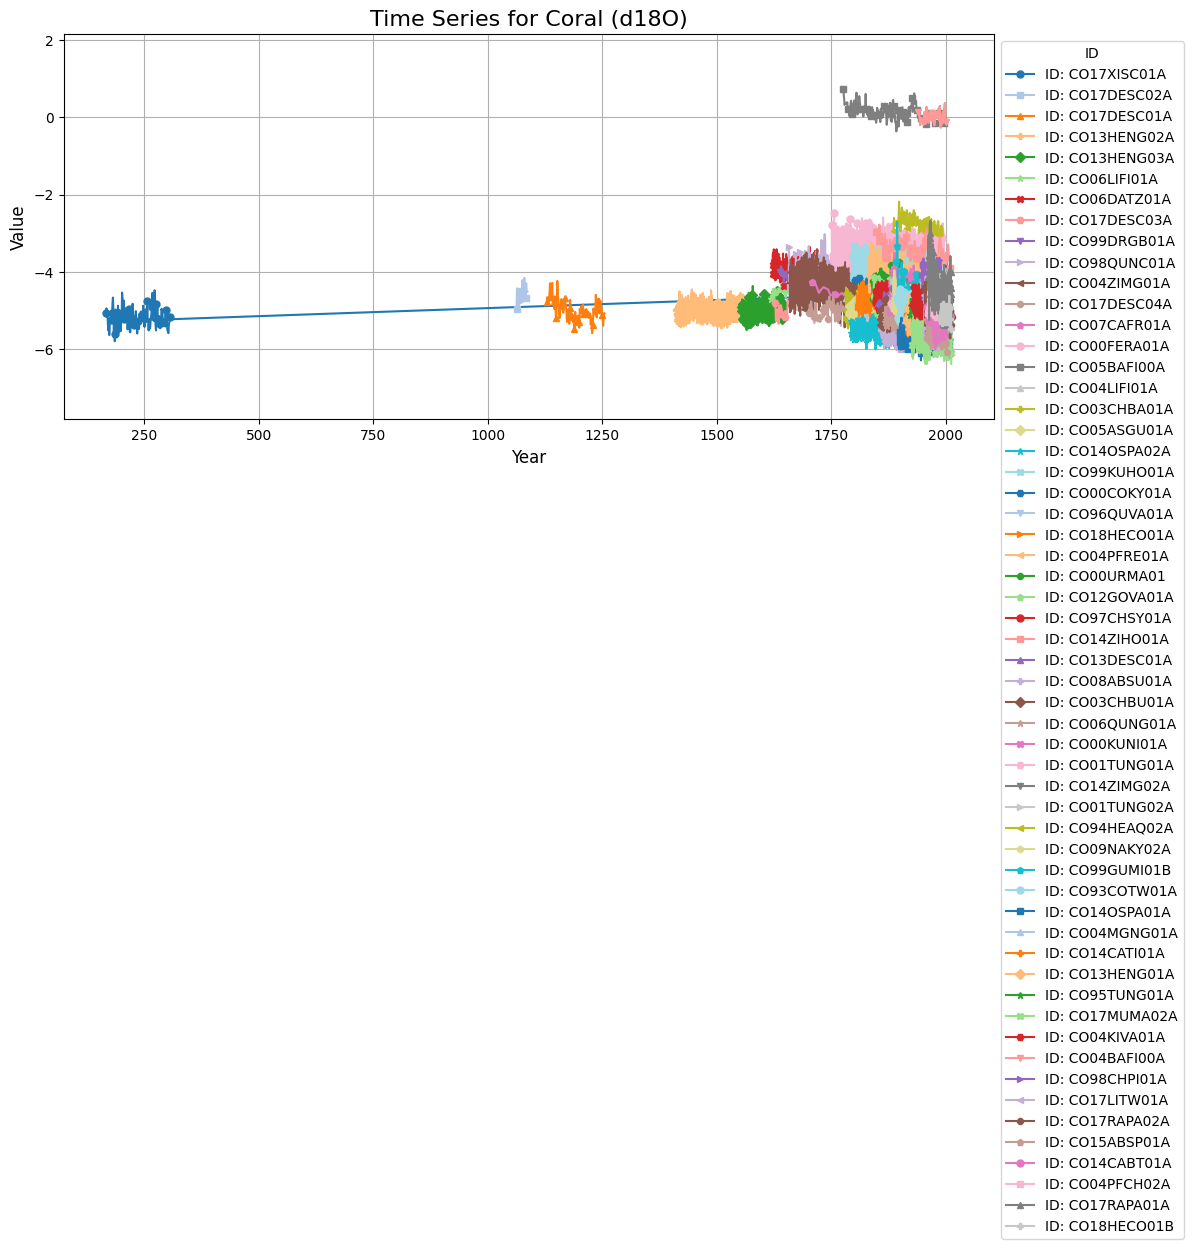

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


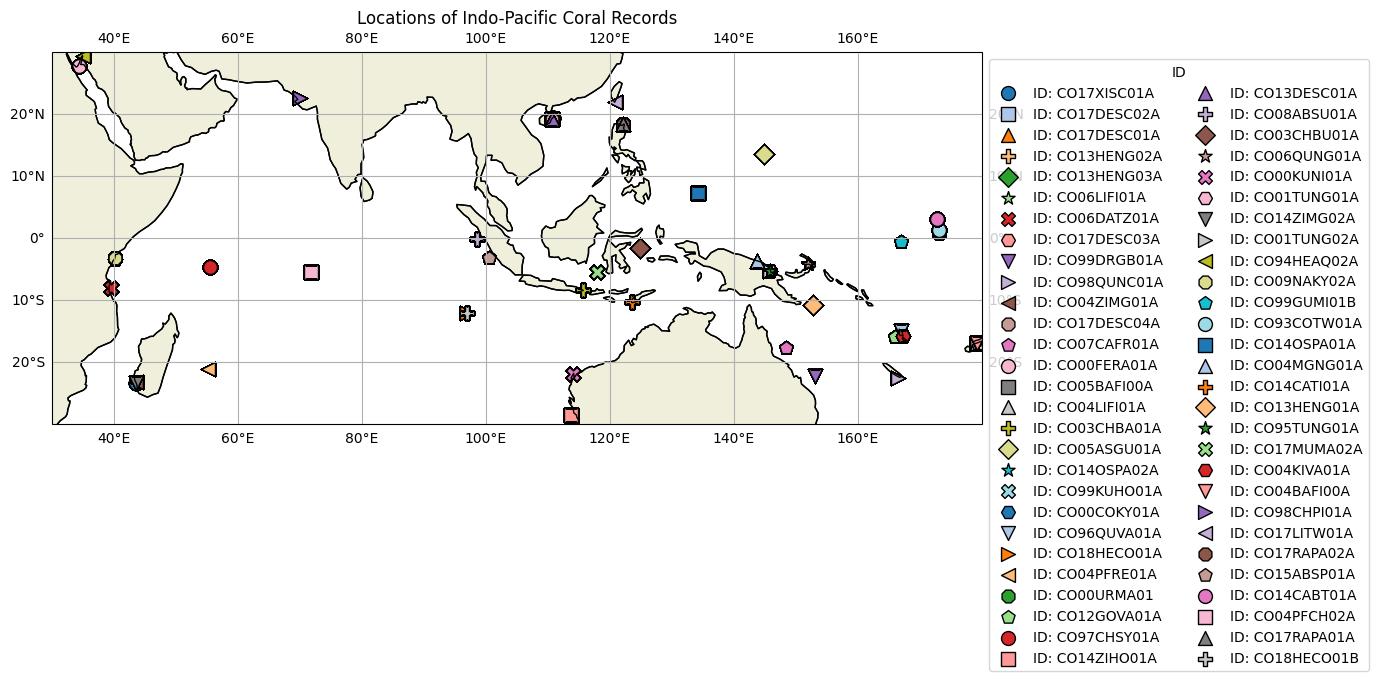

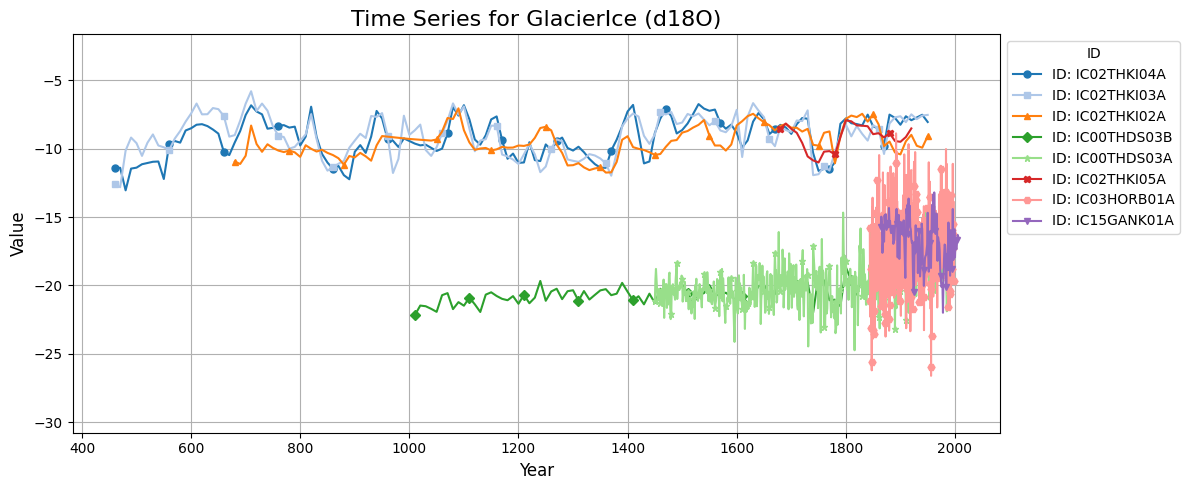

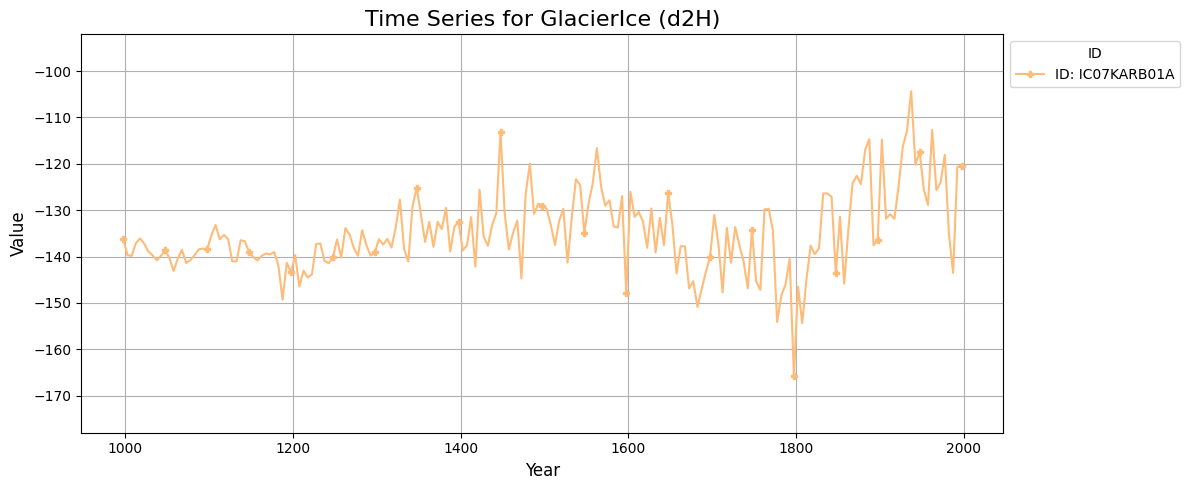

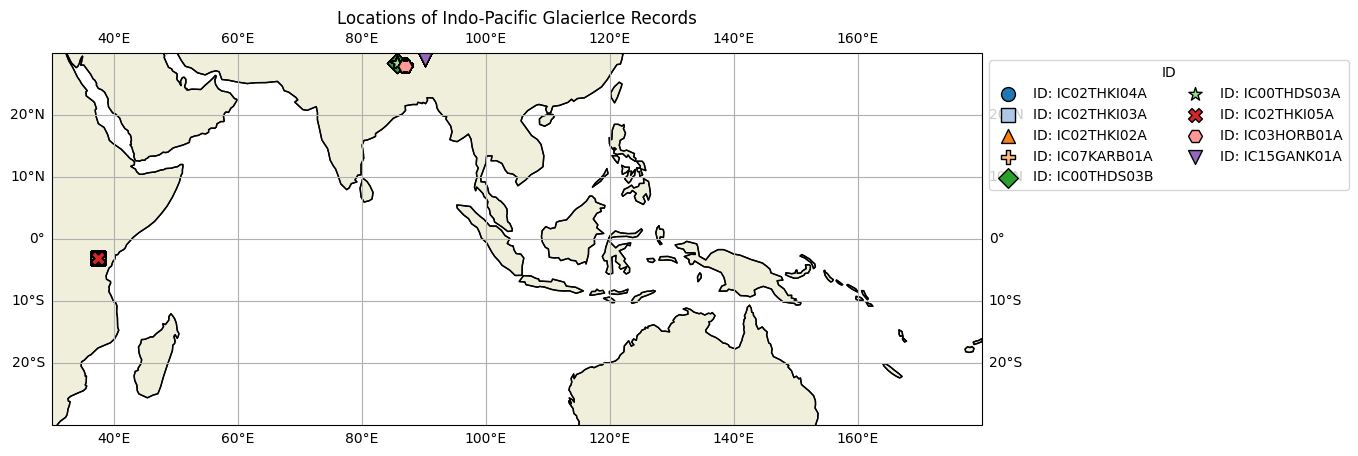

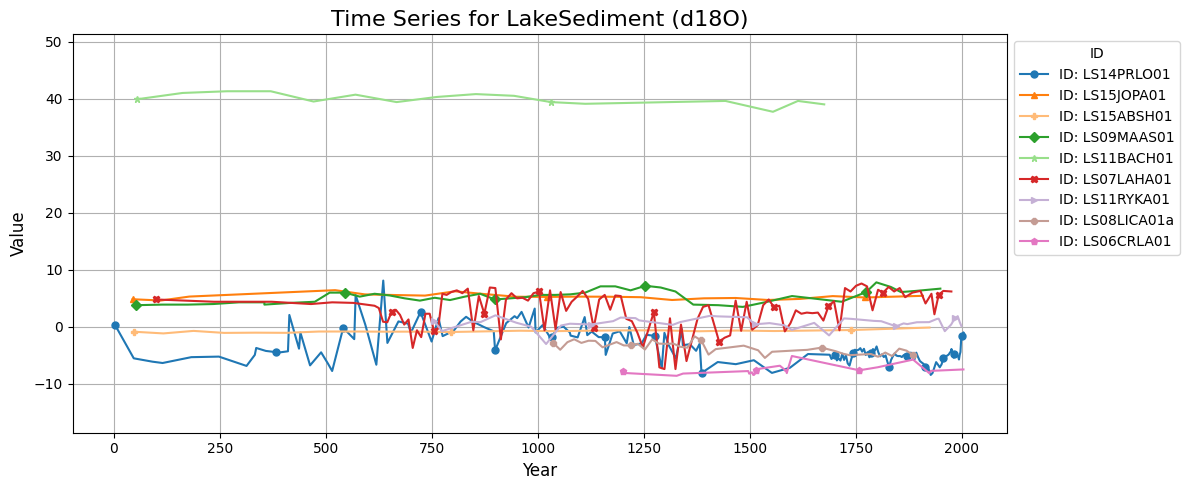

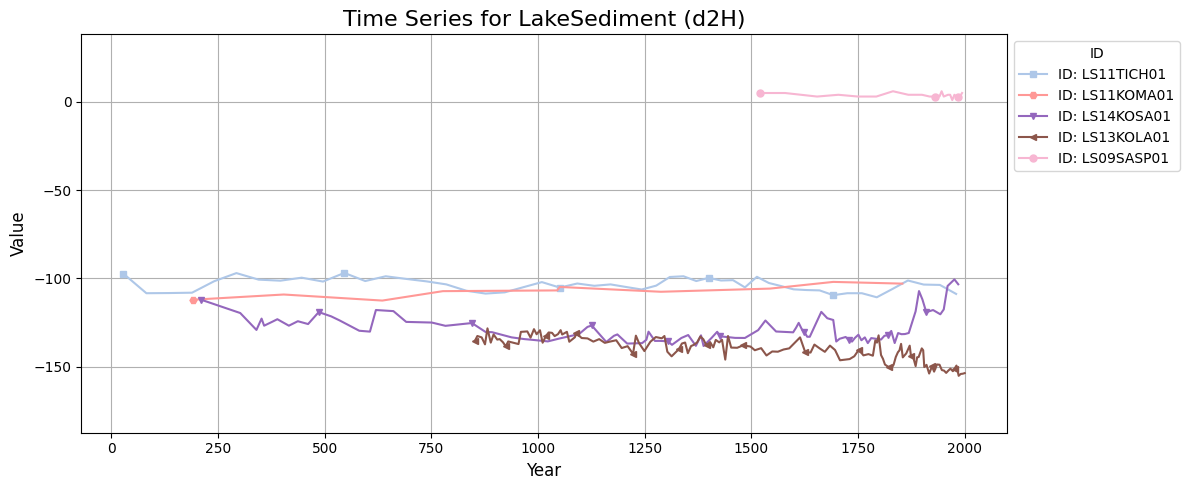

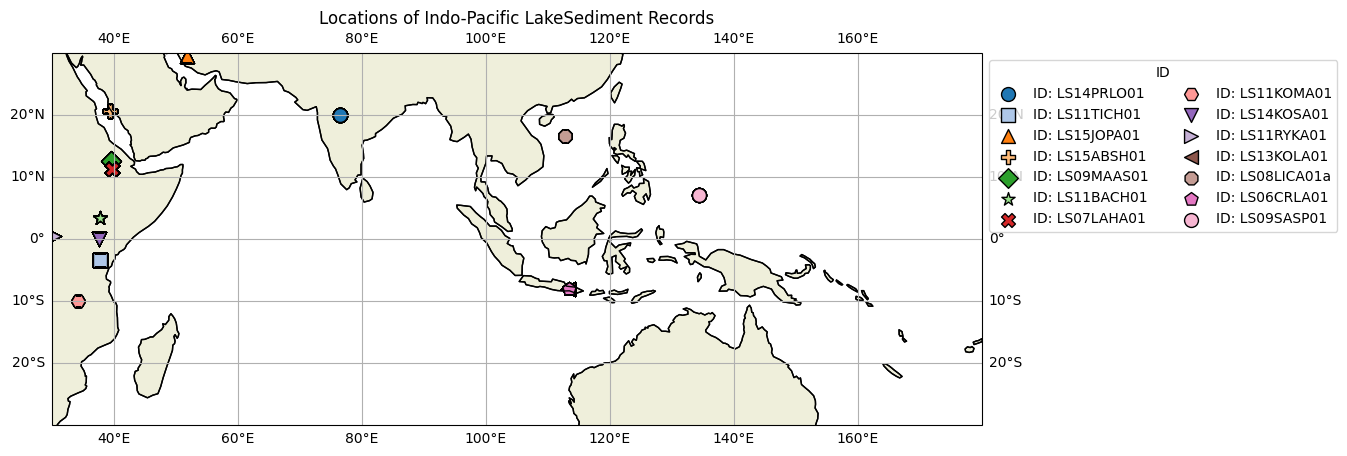

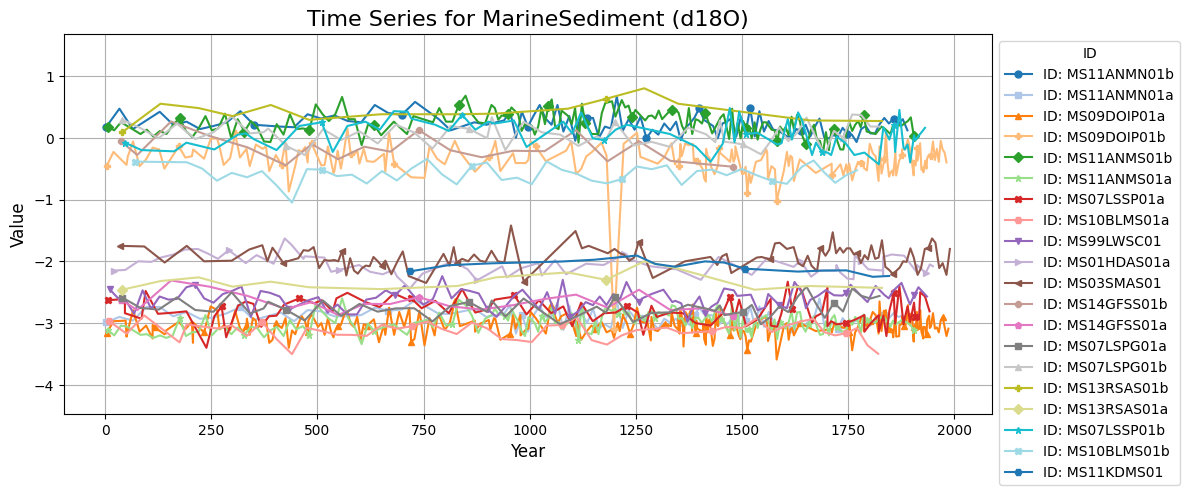

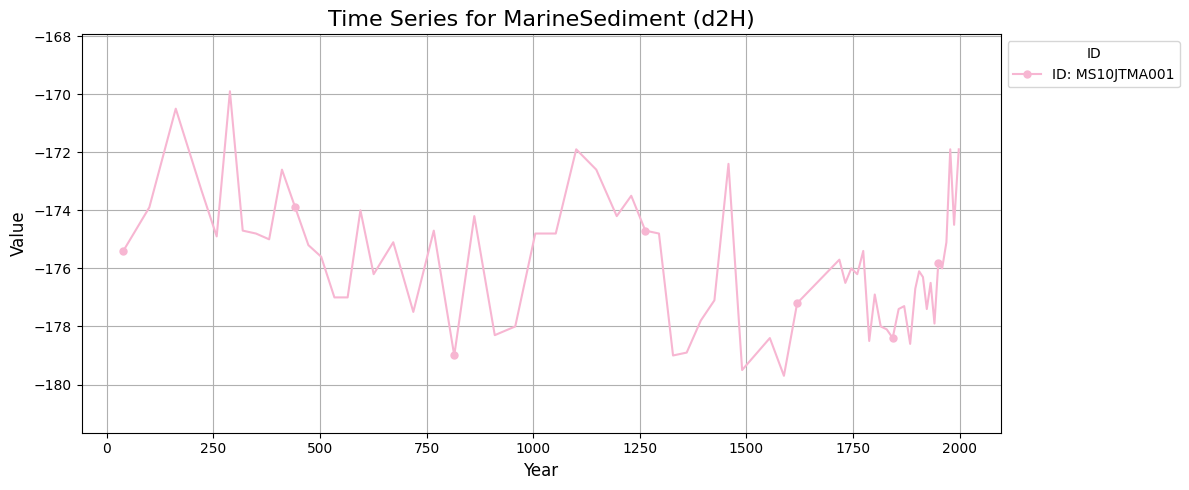

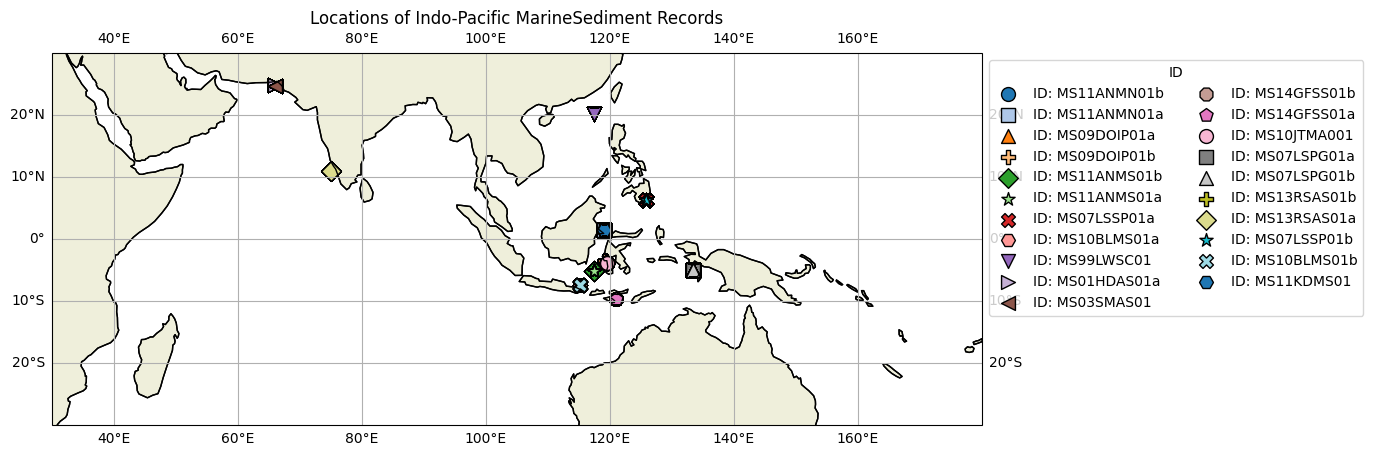

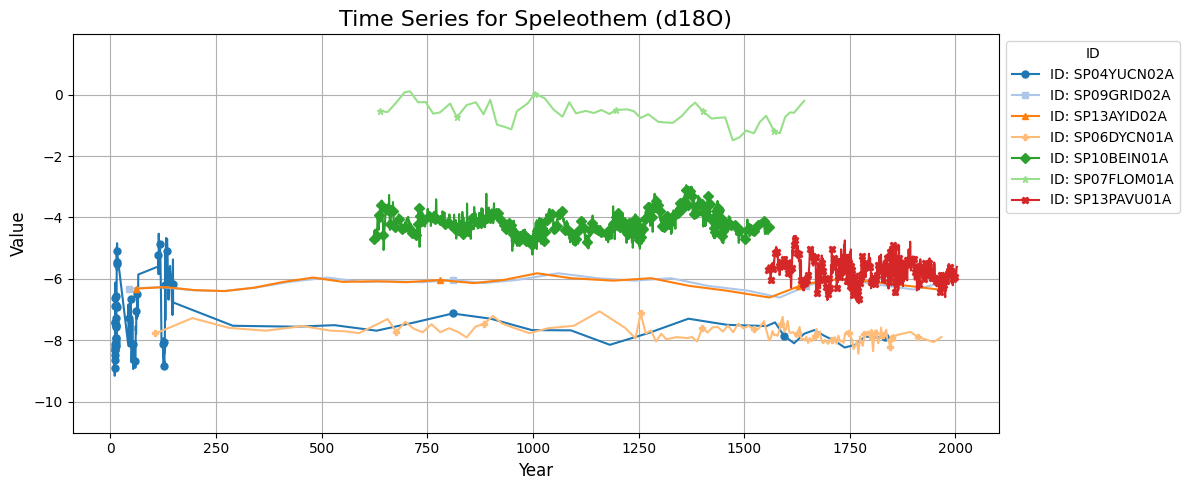

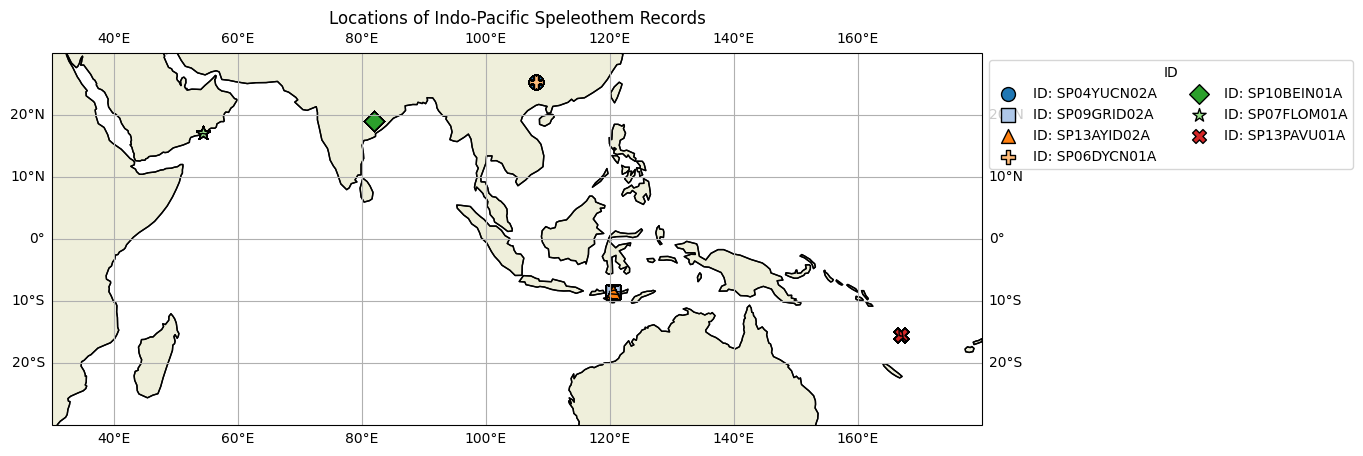

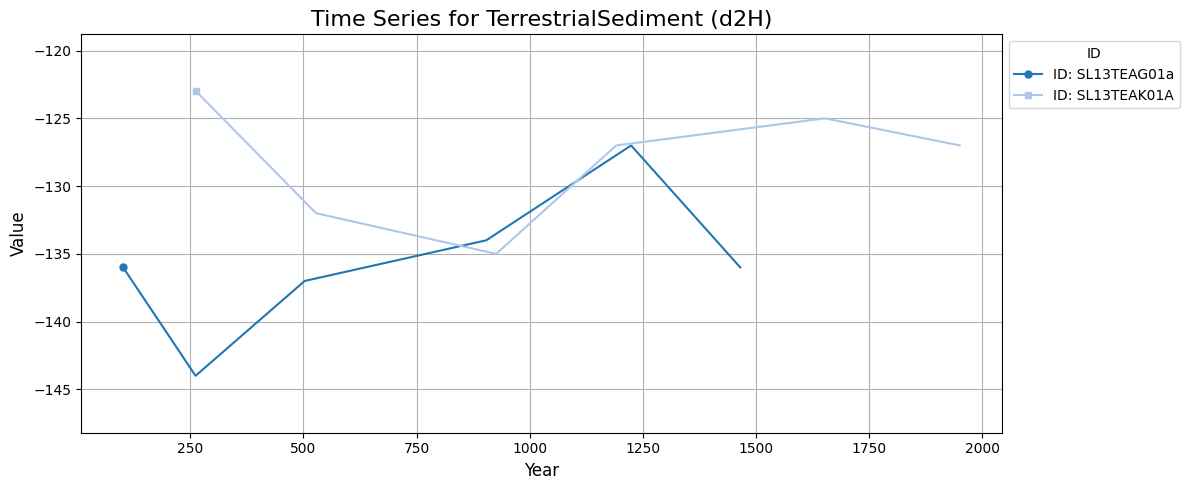

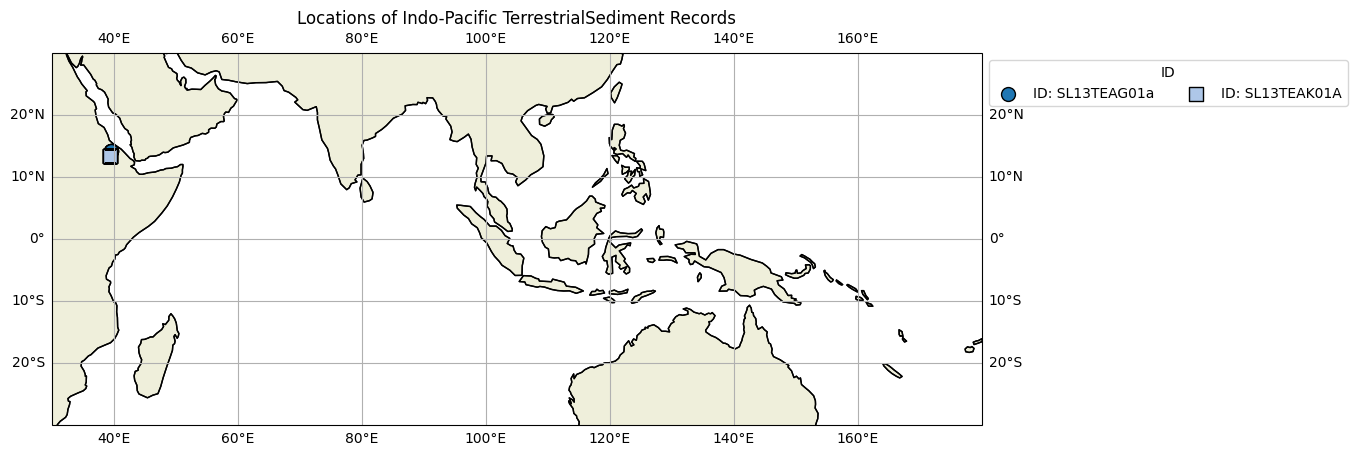

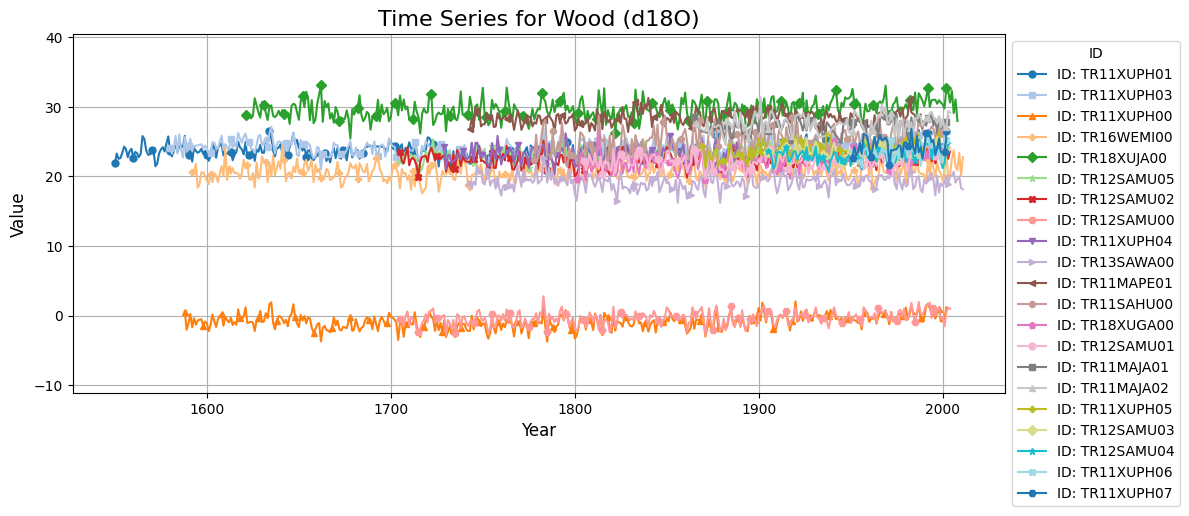

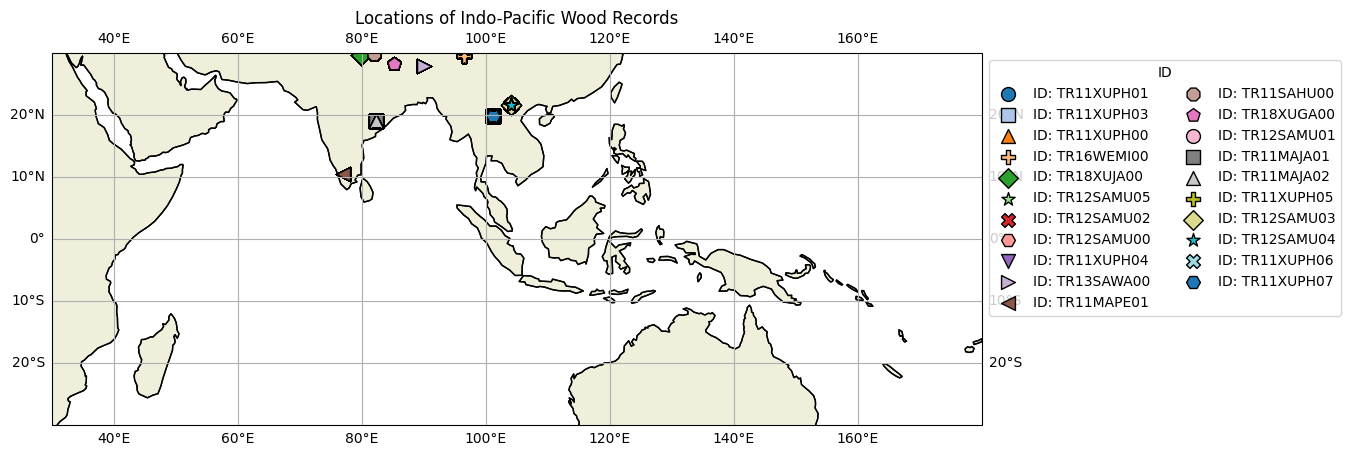

In [ ]:
# Define a set of unique markers
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']

# Function to plot time series and map, grouping by archiveType
def plot_time_series_and_map_by_archiveType(df, lat_min, lat_max, lon_min, lon_max):
    # Group data by 'archiveType'
    archiveType_groups = df.groupby('archiveType')

    for archiveType, archiveType_df in archiveType_groups:
        # Define a color palette for the entire archiveType group (each record gets a unique color)
        num_records = archiveType_df['ID'].nunique()
        color_palette = sns.color_palette("tab20", num_records)

        # Assign unique colors and markers to each ID
        id_to_color = {tsid: color_palette[i % len(color_palette)] for i, tsid in enumerate(archiveType_df['ID'].unique())}
        id_to_marker = {tsid: markers[i % len(markers)] for i, tsid in enumerate(archiveType_df['ID'].unique())}

        # Plot separate time series graphs for each VariableName
        variable_groups = archiveType_df.groupby('VariableName')

        for variable, group in variable_groups:
            plt.figure(figsize=(12, 5))

            for unique_id in group['ID'].unique():
                ts_data = group[group['ID'] == unique_id]
                plt.plot(
                    ts_data['Year'],
                    ts_data['Value'],
                    label=f"ID: {unique_id}",
                    color=id_to_color[unique_id],
                    marker=id_to_marker[unique_id],  # Add markers
                    markersize=5,  # Set marker size
                    linestyle='-',  # Ensure it's a line plot
                    markevery=10,
                )

            y_min, y_max = group['Value'].min(), group['Value'].max()
            padding = (y_max - y_min) * 0.2  # 20% padding
            plt.ylim(y_min - padding, y_max + padding)

            plt.title(f"Time Series for {archiveType} ({variable})", fontsize=16)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Value", fontsize=12)
            plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1))
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        # Plot a single map for all records under this archiveType
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

        # Add map features
        ax.add_feature(cfeature.LAND, edgecolor="black")
        ax.add_feature(cfeature.COASTLINE)
        ax.gridlines(draw_labels=True)

        # Plot points with the same color and marker used in the time series
        for unique_id in archiveType_df['ID'].unique():
            archive_data = archiveType_df[archiveType_df['ID'] == unique_id]
            ax.scatter(
                archive_data['Longitude'],
                archive_data['Latitude'],
                color=id_to_color[unique_id],
                marker=id_to_marker[unique_id],  # Use the same marker style
                edgecolor="black",
                s=100,
                transform=ccrs.PlateCarree(),
                label=f"ID: {unique_id}"
            )

        plt.title(f"Locations of Indo-Pacific {archiveType} Records")
        plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)  # Multi-column legend
        plt.show()

# Example Usage
plot_time_series_and_map_by_archiveType(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)


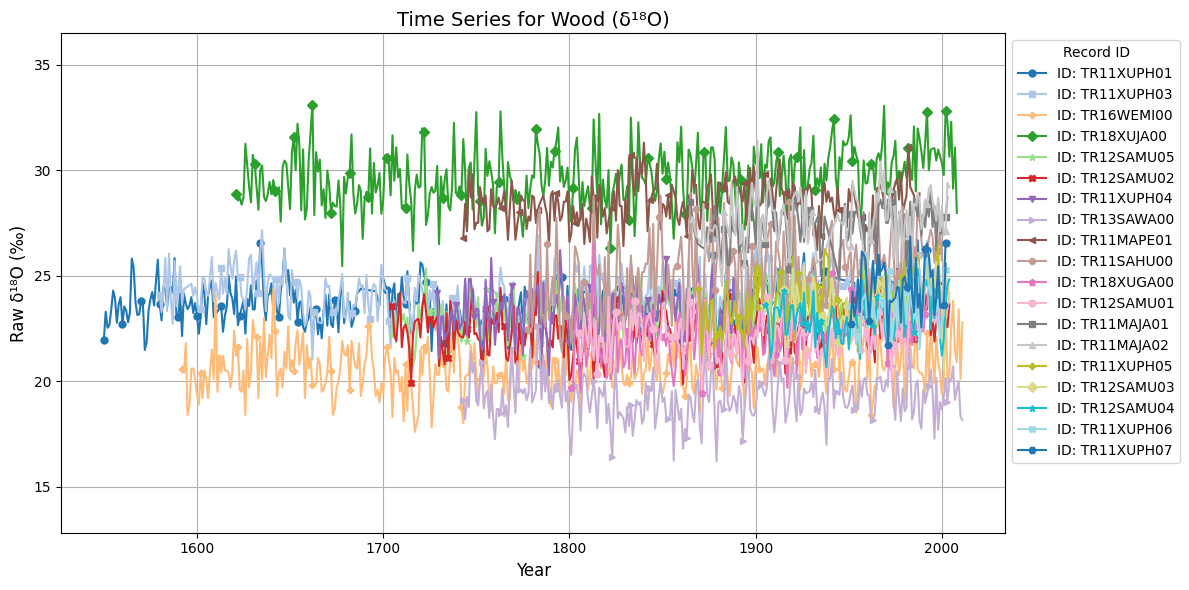

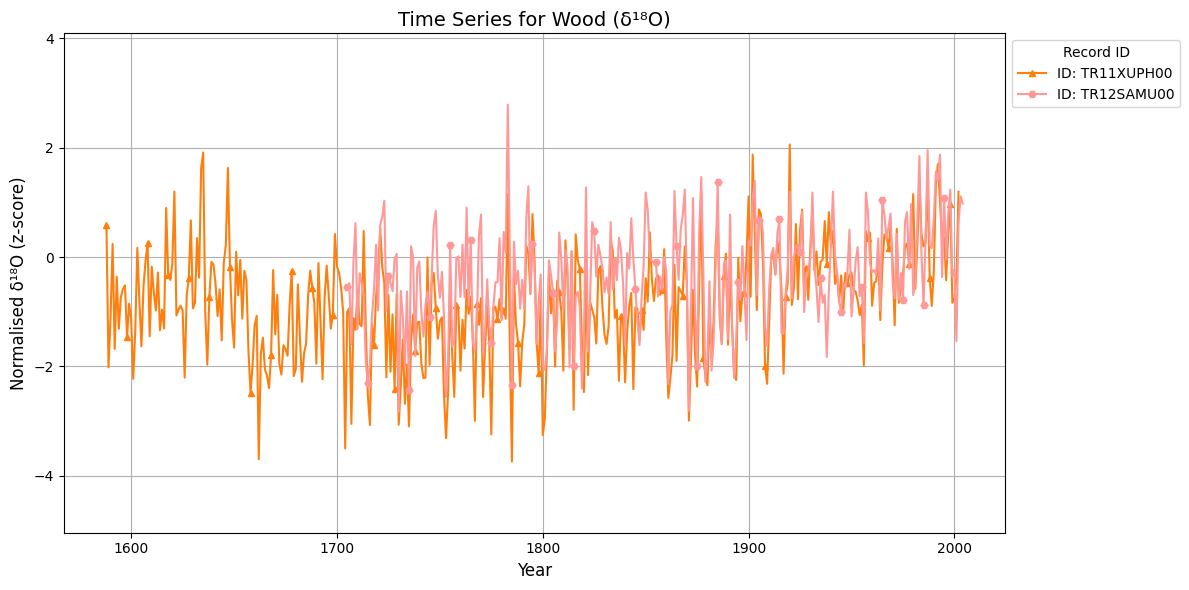

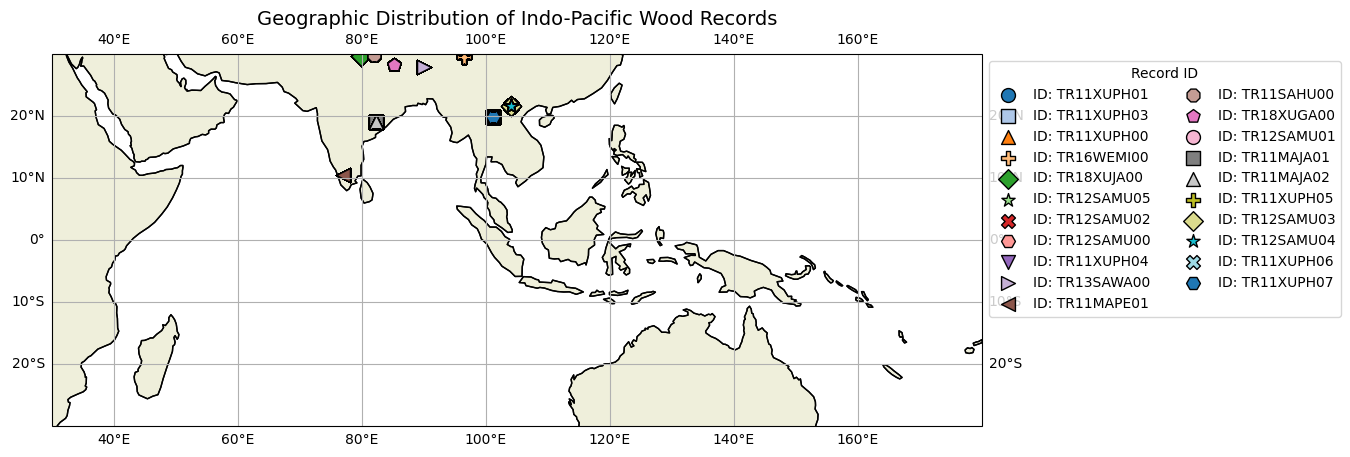

In [ ]:
def plot_wood_time_series_by_units_with_combined_map(df, lat_min, lat_max, lon_min, lon_max):
    # Filter to only 'Wood' archiveType
    wood_df = df[df['archiveType'] == 'Wood'].copy()

    # Ensure Value column is numeric
    wood_df['Value'] = pd.to_numeric(wood_df['Value'], errors='coerce')
    wood_df.dropna(subset=['Value'], inplace=True)

    # Get unique IDs and assign colors/markers
    unique_ids = wood_df['ID'].unique()
    num_ids = len(unique_ids)
    color_palette = sns.color_palette("tab20", num_ids)
    id_to_color = {uid: color_palette[i % len(color_palette)] for i, uid in enumerate(unique_ids)}
    id_to_marker = {uid: markers[i % len(markers)] for i, uid in enumerate(unique_ids)}

    # --- Plot time series grouped by units ---
    for unit, unit_df in wood_df.groupby('Units'):
        plt.figure(figsize=(12, 6))
        for uid in unit_df['ID'].unique():
            ts_data = unit_df[unit_df['ID'] == uid]
            plt.plot(
                ts_data['Year'],
                ts_data['Value'],
                label=f"ID: {uid}",
                color=id_to_color[uid],
                marker=id_to_marker[uid],
                linestyle='-',
                markersize=5,
                markevery=10,
            )
        y_min, y_max = unit_df['Value'].min(), unit_df['Value'].max()
        padding = (y_max - y_min) * 0.2
        plt.ylim(y_min - padding, y_max + padding)

        # Adjust y-label based on units
        if unit.lower() == "permil":
            ylabel = "Raw δ¹⁸O (‰)"
        elif unit.lower() == "zscore":
            ylabel = "Normalised δ¹⁸O (z-score)"
        else:
            ylabel = f"δ¹⁸O ({unit})"

        plt.title("Time Series for Wood (δ¹⁸O)", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # --- Single map for all Wood records ---
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    for uid in unique_ids:
        rec_df = wood_df[wood_df['ID'] == uid]
        ax.scatter(
            rec_df['Longitude'],
            rec_df['Latitude'],
            color=id_to_color[uid],
            marker=id_to_marker[uid],
            edgecolor="black",
            s=100,
            transform=ccrs.PlateCarree(),
            label=f"ID: {uid}"
        )

    plt.title("Geographic Distribution of Indo-Pacific Wood Records", fontsize=14)
    plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.show()

plot_wood_time_series_by_units_with_combined_map(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)

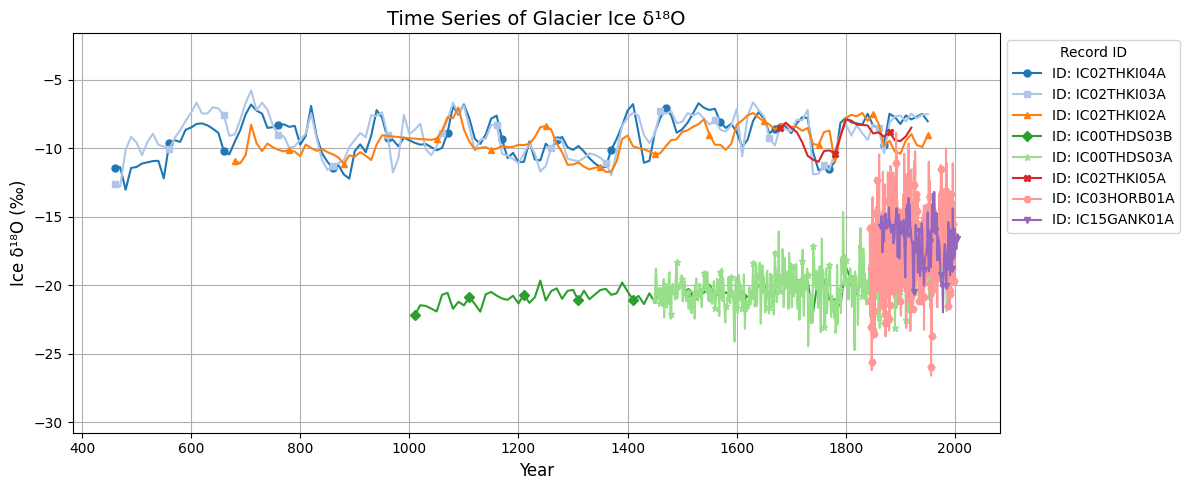

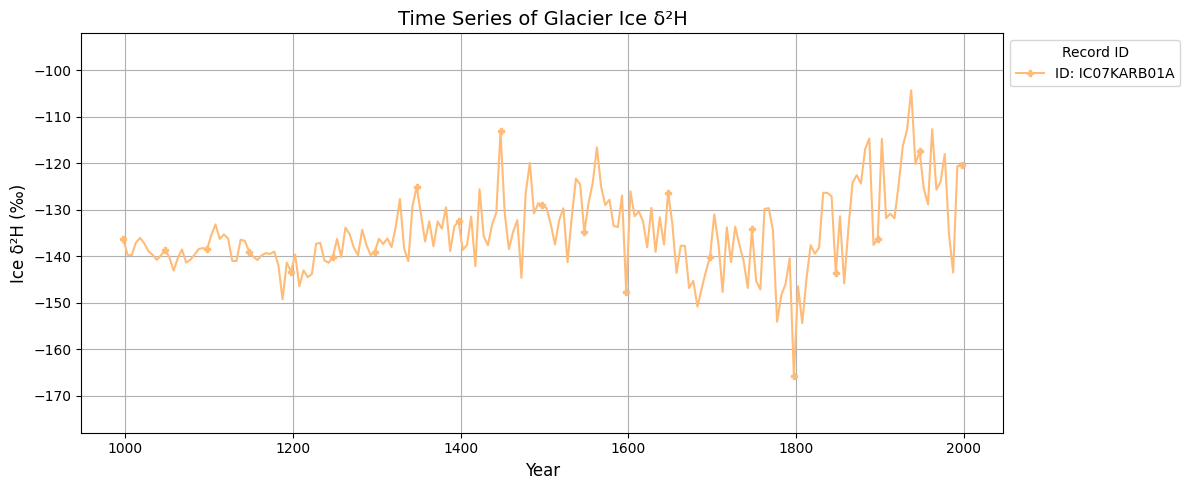

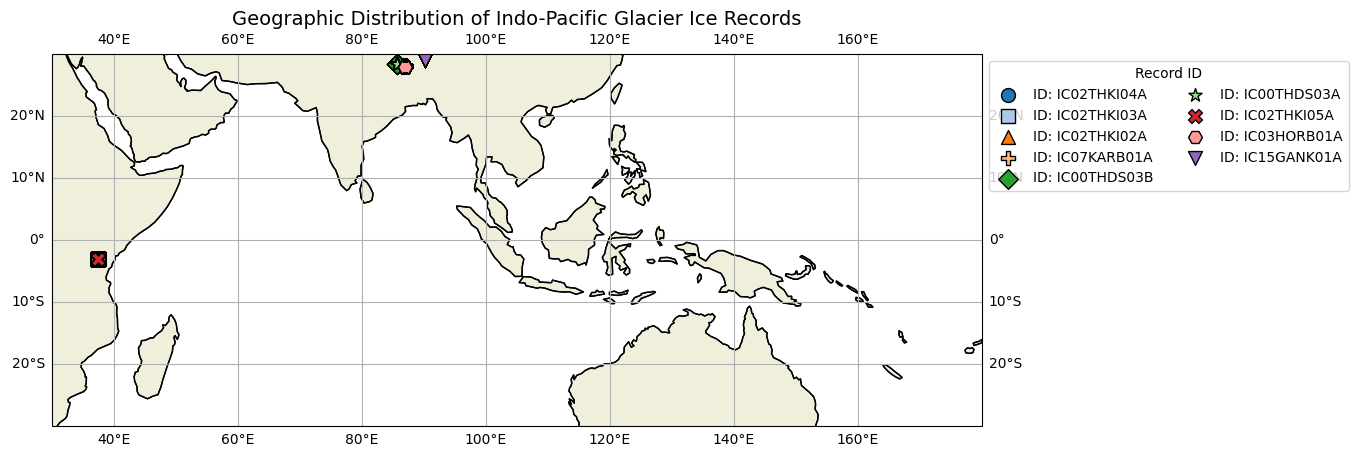

In [ ]:
def plot_glacier_ice_timeseries_and_map(df, lat_min, lat_max, lon_min, lon_max):
    # Filter to GlacierIce only
    glacier_df = df[df['archiveType'] == 'GlacierIce'].copy()
    glacier_df['Value'] = pd.to_numeric(glacier_df['Value'], errors='coerce')
    glacier_df.dropna(subset=['Value'], inplace=True)

    # Assign colors and markers per ID
    unique_ids = glacier_df['ID'].unique()
    num_ids = len(unique_ids)
    color_palette = sns.color_palette("tab20", num_ids)
    id_to_color = {uid: color_palette[i % len(color_palette)] for i, uid in enumerate(unique_ids)}
    id_to_marker = {uid: markers[i % len(markers)] for i, uid in enumerate(unique_ids)}

    # Plot time series grouped by VariableName
    for varname, group in glacier_df.groupby("VariableName"):
        plt.figure(figsize=(12, 5))
        for uid in group['ID'].unique():
            ts_data = group[group['ID'] == uid]
            plt.plot(
                ts_data['Year'],
                ts_data['Value'],
                label=f"ID: {uid}",
                color=id_to_color[uid],
                marker=id_to_marker[uid],
                linestyle='-',
                markersize=5,
                markevery=10,
            )

        y_min, y_max = group['Value'].min(), group['Value'].max()
        padding = (y_max - y_min) * 0.2
        plt.ylim(y_min - padding, y_max + padding)

        # Specific labels
        if varname.lower() == "d18o":
            ylabel = "Ice δ¹⁸O (‰)"
            title = "Time Series of Glacier Ice δ¹⁸O"
        elif varname.lower() == "d2h":
            ylabel = "Ice δ²H (‰)"
            title = "Time Series of Glacier Ice δ²H"
        else:
            ylabel = f"{varname} (raw values)"
            title = f"Time Series of {varname} in Glacier Ice"

        plt.title(title, fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot all glacier sites on one map
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    for uid in unique_ids:
        rec_df = glacier_df[glacier_df['ID'] == uid]
        ax.scatter(
            rec_df['Longitude'],
            rec_df['Latitude'],
            color=id_to_color[uid],
            marker=id_to_marker[uid],
            edgecolor="black",
            s=100,
            transform=ccrs.PlateCarree(),
            label=f"ID: {uid}"
        )

    plt.title("Geographic Distribution of Indo-Pacific Glacier Ice Records", fontsize=14)
    plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.show()

plot_glacier_ice_timeseries_and_map(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)

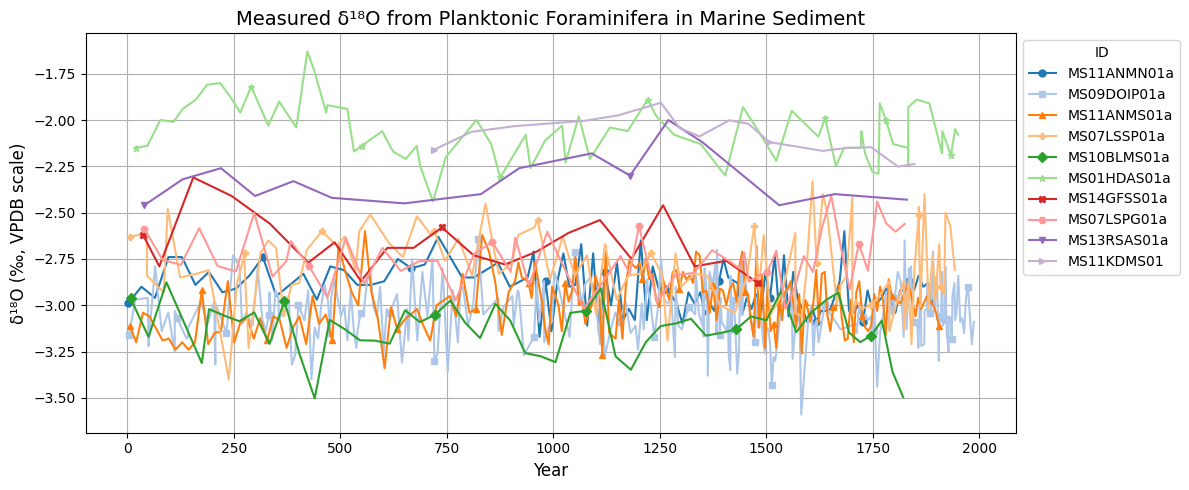

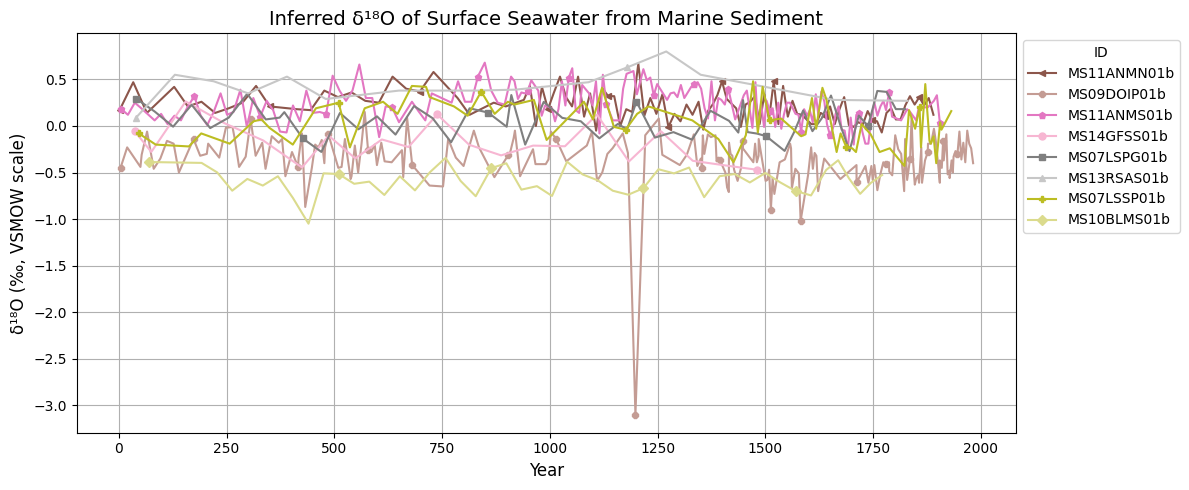

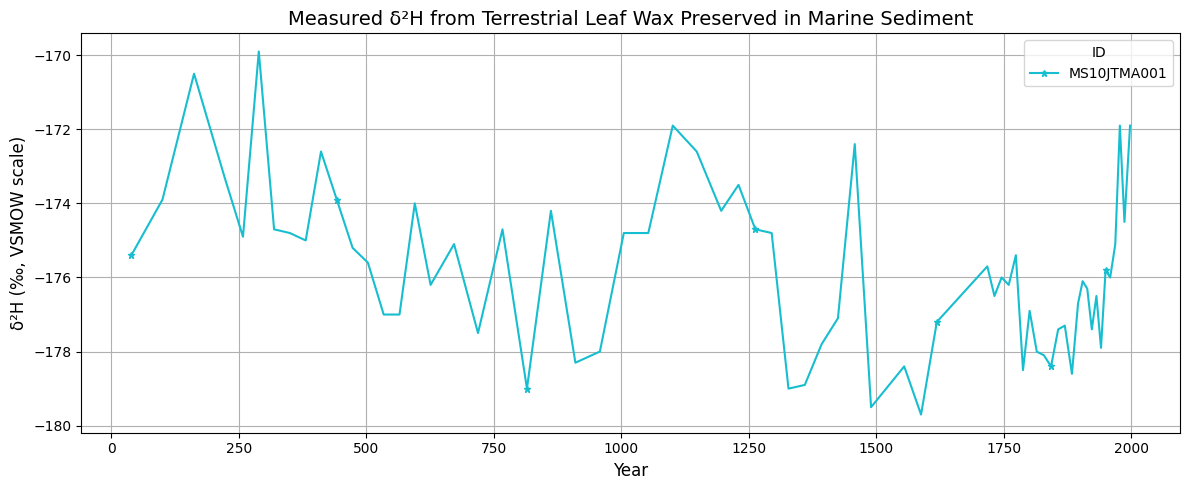

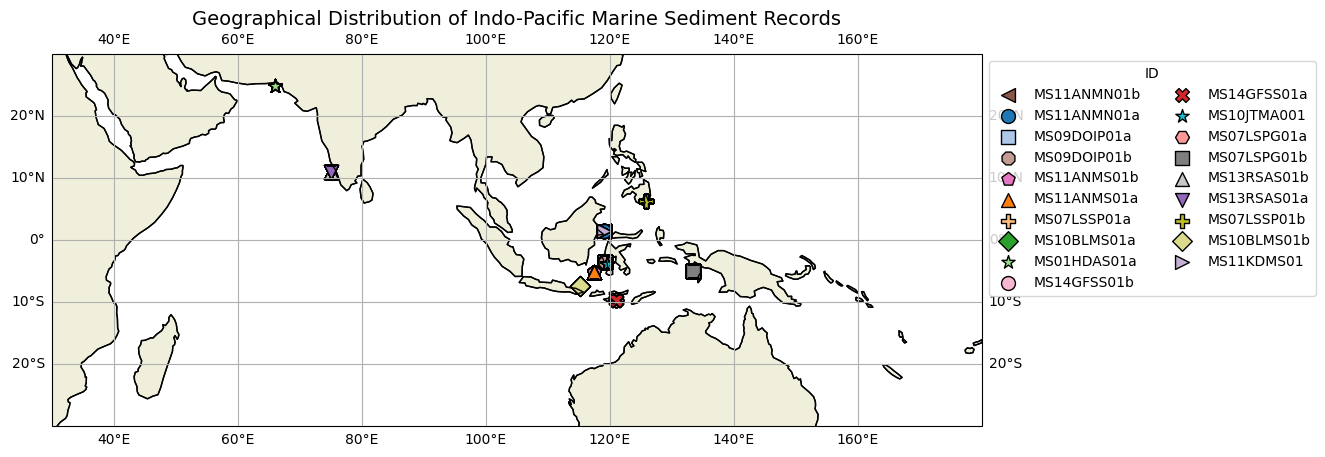

In [ ]:
# Define markers and colors
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']
color_palette = sns.color_palette("tab20", 20)

# Function to plot time series
def plot_time_series(df_subset, title, ylabel, marker_map, color_map):
    plt.figure(figsize=(12, 5))
    for uid in df_subset['ID'].unique():
        record = df_subset[df_subset['ID'] == uid]
        plt.plot(
            record['Year'],
            record['Value'],
            label=str(uid),
            color=color_map[uid],
            marker=marker_map[uid],
            linestyle='-',
            markersize=5,
            markevery=10
        )
    plt.title(title, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.legend(title="ID", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Filter only MarineSediment records
marine_df = filtered_df[filtered_df['archiveType'] == 'MarineSediment']

# Define record groups
measured_ids = [rid for rid in marine_df['ID'].unique() if rid.endswith('a')] + ['MS11KDMS01']
inferred_ids = [rid for rid in marine_df['ID'].unique() if rid.endswith('b')]
d2H_id = 'MS10JTMA001'

measured_df = marine_df[marine_df['ID'].isin(measured_ids)]
inferred_df = marine_df[marine_df['ID'].isin(inferred_ids)]
d2h_df = marine_df[marine_df['ID'] == d2H_id]
map_df = marine_df[marine_df['ID'].isin(measured_ids + inferred_ids + [d2H_id])]

# Assign unique markers and colors
all_ids = measured_ids + inferred_ids + [d2H_id]
id_to_marker = {uid: markers[i % len(markers)] for i, uid in enumerate(all_ids)}
id_to_color = {uid: color_palette[i % len(color_palette)] for i, uid in enumerate(all_ids)}

# Plot time series
plot_time_series(measured_df, "Measured δ¹⁸O from Planktonic Foraminifera in Marine Sediment", "δ¹⁸O (‰, VPDB scale)", id_to_marker, id_to_color)
plot_time_series(inferred_df, "Inferred δ¹⁸O of Surface Seawater from Marine Sediment", "δ¹⁸O (‰, VSMOW scale)", id_to_marker, id_to_color)
plot_time_series(d2h_df, "Measured δ²H from Terrestrial Leaf Wax Preserved in Marine Sediment", "δ²H (‰, VSMOW scale)", id_to_marker, id_to_color)

# Plot map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([30, 180, -30, 30], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

for uid in map_df['ID'].unique():
    loc = map_df[map_df['ID'] == uid]
    ax.scatter(
        loc['Longitude'],
        loc['Latitude'],
        color=id_to_color[uid],
        marker=id_to_marker[uid],
        edgecolor='black',
        s=100,
        transform=ccrs.PlateCarree(),
        label=uid
    )

plt.title("Geographical Distribution of Indo-Pacific Marine Sediment Records", fontsize=14)
plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

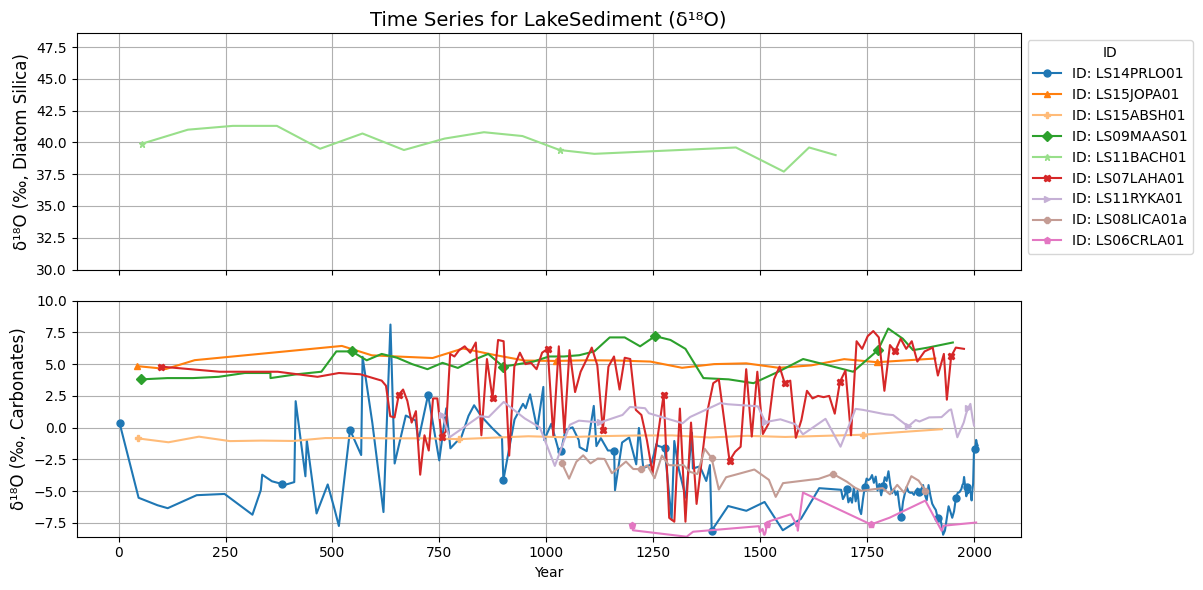

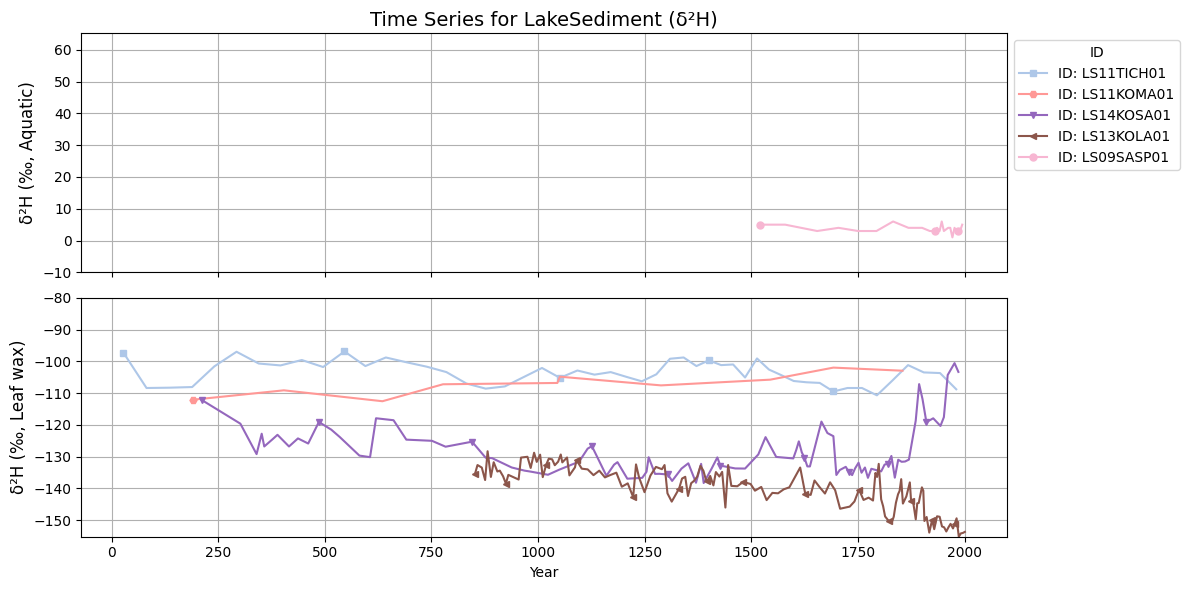

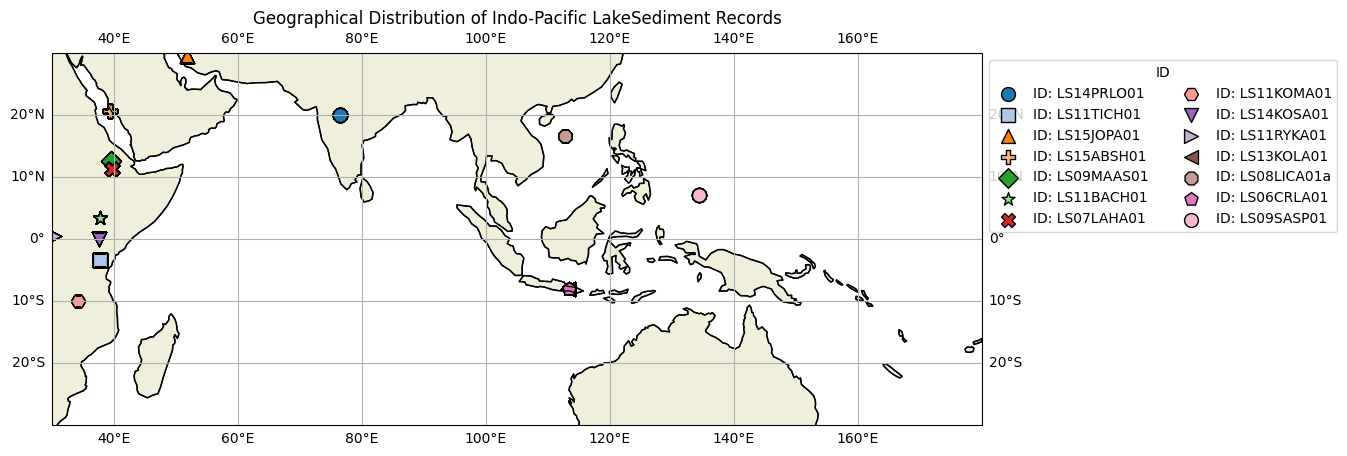

In [ ]:
# Define a set of unique markers
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']

def plot_lake_sediment_time_series_and_map(df, lat_min, lat_max, lon_min, lon_max):
    # Filter for LakeSediment (d18O and d2H)
    lake_sediment = df[df['archiveType'] == 'LakeSediment']
    lake_sediment_d18O = lake_sediment[lake_sediment['VariableName'] == 'd18O']
    lake_sediment_d2H = lake_sediment[lake_sediment['VariableName'] == 'd2H']

    # Combine both datasets for color consistency
    all_ids = lake_sediment['ID'].unique()
    color_palette = sns.color_palette("tab20", len(all_ids))
    id_to_color = {tsid: color_palette[i % len(color_palette)] for i, tsid in enumerate(all_ids)}
    id_to_marker = {tsid: markers[i % len(markers)] for i, tsid in enumerate(all_ids)}

    # Determine the range for scaling
    d18O_upper_range = lake_sediment_d18O['Value'].max() - 30
    d18O_lower_range = 10 - lake_sediment_d18O['Value'].min()
    d18O_max_range = max(d18O_upper_range, d18O_lower_range)  # Use the larger range to scale equally

    d2H_upper_range = lake_sediment_d2H['Value'].max() + 10
    d2H_lower_range = abs(-80 - lake_sediment_d2H['Value'].min())
    d2H_max_range = max(d2H_upper_range, d2H_lower_range)  # Use the larger range to scale equally

    # --- Time Series Plot for d18O with Equal Y-Scale ---
    fig, axes = plt.subplots(nrows=2, figsize=(12, 6), sharex=True)

    for unique_id in lake_sediment_d18O['ID'].unique():
        ts_data = lake_sediment_d18O[lake_sediment_d18O['ID'] == unique_id]
        color = id_to_color[unique_id]
        marker = id_to_marker[unique_id]

        # Plot values above 30
        high_values = ts_data[ts_data['Value'] > 30]
        axes[0].plot(high_values['Year'], high_values['Value'], label=f"ID: {unique_id}",
                     color=color, marker=marker, markersize=5, linestyle='-', markevery=10)

        # Plot values below 10
        low_values = ts_data[ts_data['Value'] < 10]
        axes[1].plot(low_values['Year'], low_values['Value'], label=f"ID: {unique_id}",
                     color=color, marker=marker, markersize=5, linestyle='-', markevery=10)

    # Set y-limits for equal scaling
    axes[0].set_ylim(30, 30 + d18O_max_range)  # Scale upper plot
    axes[1].set_ylim(10 - d18O_max_range, 10)  # Scale lower plot

    # Formatting the d18O plots
    axes[0].set_ylabel("δ¹⁸O (‰, Diatom Silica)", fontsize=12)
    axes[1].set_ylabel("δ¹⁸O (‰, Carbonates)", fontsize=12)
    axes[1].set_xlabel("Year")
    axes[0].set_title("Time Series for LakeSediment (δ¹⁸O)", fontsize=14)
    axes[0].legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1))
    axes[0].grid(True)
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()

    # --- Time Series Plot for d2H with Equal Y-Scale ---
    fig, axes = plt.subplots(nrows=2, figsize=(12, 6), sharex=True)

    for unique_id in lake_sediment_d2H['ID'].unique():
        ts_data = lake_sediment_d2H[lake_sediment_d2H['ID'] == unique_id]
        color = id_to_color[unique_id]
        marker = id_to_marker[unique_id]

        # Plot values above -10
        high_values = ts_data[ts_data['Value'] > -10]
        axes[0].plot(high_values['Year'], high_values['Value'], label=f"ID: {unique_id}",
                     color=color, marker=marker, markersize=5, linestyle='-', markevery=10)

        # Plot values below -80
        low_values = ts_data[ts_data['Value'] < -80]
        axes[1].plot(low_values['Year'], low_values['Value'], label=f"ID: {unique_id}",
                     color=color, marker=marker, markersize=5, linestyle='-', markevery=10)

    # Set y-limits for equal scaling
    axes[0].set_ylim(-10, -10 + d2H_max_range)  # Scale upper plot
    axes[1].set_ylim(-80 - d2H_max_range, -80)  # Scale lower plot

    # Formatting the d2H plots
    axes[0].set_ylabel("δ²H (‰, Aquatic)", fontsize=12)
    axes[1].set_ylabel("δ²H (‰, Leaf wax)", fontsize=12)
    axes[1].set_xlabel("Year")
    axes[0].set_title("Time Series for LakeSediment (δ²H)", fontsize=14)
    axes[0].legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1))
    axes[0].grid(True)
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()

    # --- Combined Map Plot for LakeSediment (d18O & d2H) ---
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    # Plot points for both d18O and d2H records
    for unique_id in all_ids:
        archive_data = lake_sediment[lake_sediment['ID'] == unique_id]
        ax.scatter(
            archive_data['Longitude'], archive_data['Latitude'],
            color=id_to_color[unique_id], marker=id_to_marker[unique_id],
            edgecolor="black", s=100, transform=ccrs.PlateCarree(),
            label=f"ID: {unique_id}"
        )

    plt.title("Geographical Distribution of Indo-Pacific LakeSediment Records")
    plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.show()

# Example Usage
plot_lake_sediment_time_series_and_map(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)


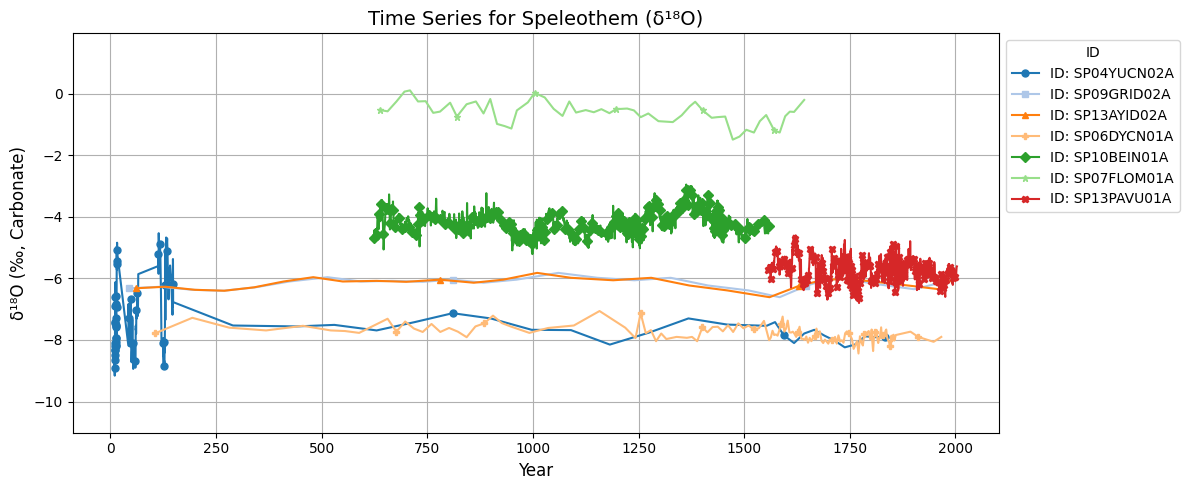

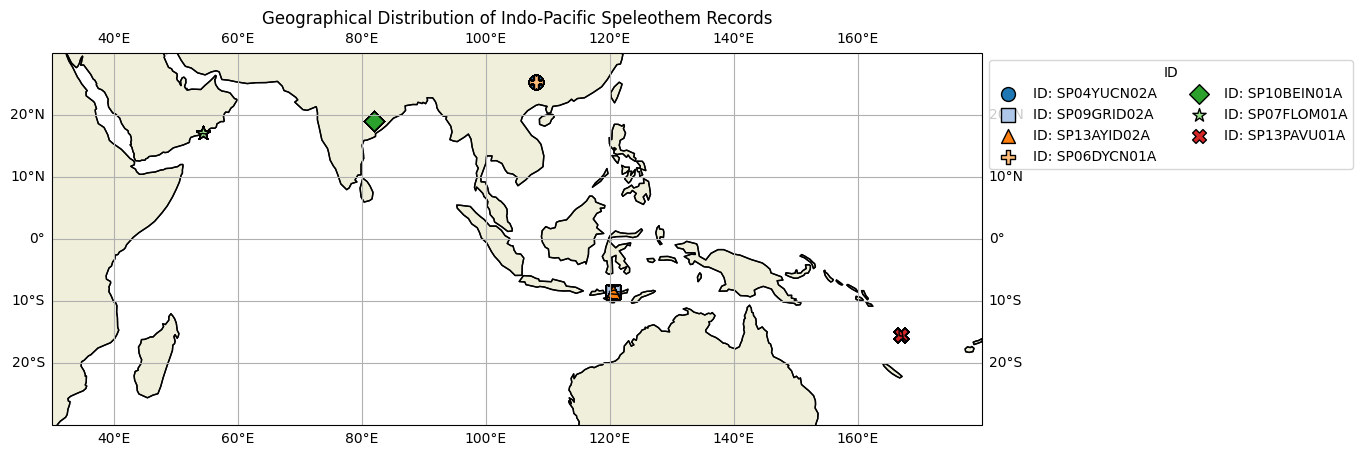

In [ ]:
# Define a set of unique markers
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']

def plot_speleothem_time_series_and_map(df, lat_min, lat_max, lon_min, lon_max):
    # Filter for speleothem only
    speleothem_df = df[df['archiveType'] == 'Speleothem']

    # Define a color palette for speleothem group (each record gets a unique color)
    num_records = speleothem_df['ID'].nunique()
    color_palette = sns.color_palette("tab20", num_records)

    id_to_color = {tsid: color_palette[i % len(color_palette)] for i, tsid in enumerate(speleothem_df['ID'].unique())}
    id_to_marker = {tsid: markers[i % len(markers)] for i, tsid in enumerate(speleothem_df['ID'].unique())}

    # Plot separate time series graphs for each VariableName
    variable_groups = speleothem_df.groupby('VariableName')

    for variable, group in variable_groups:
        plt.figure(figsize=(12, 5))

        for unique_id in group['ID'].unique():
            ts_data = group[group['ID'] == unique_id]
            plt.plot(
                ts_data['Year'],
                ts_data['Value'],
                label=f"ID: {unique_id}",
                color=id_to_color[unique_id],
                marker=id_to_marker[unique_id],
                markersize=5,
                linestyle='-',
                markevery=10,
            )

        y_min, y_max = group['Value'].min(), group['Value'].max()
        padding = (y_max - y_min) * 0.2
        plt.ylim(y_min - padding, y_max + padding)

        plt.title(f"Time Series for Speleothem (δ¹⁸O)", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("δ¹⁸O (‰, Carbonate)", fontsize=12)
        plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot map of speleothem sites
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    for unique_id in speleothem_df['ID'].unique():
        archive_data = speleothem_df[speleothem_df['ID'] == unique_id]
        ax.scatter(
            archive_data['Longitude'],
            archive_data['Latitude'],
            color=id_to_color[unique_id],
            marker=id_to_marker[unique_id],
            edgecolor="black",
            s=100,
            transform=ccrs.PlateCarree(),
            label=f"ID: {unique_id}"
        )

    plt.title("Geographical Distribution of Indo-Pacific Speleothem Records")
    plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.show()

plot_speleothem_time_series_and_map(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)

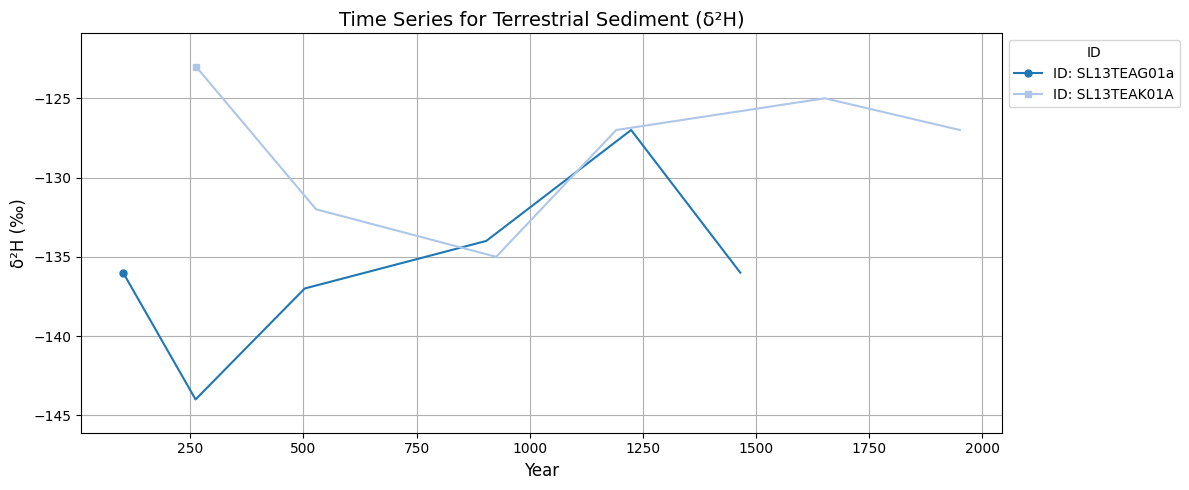

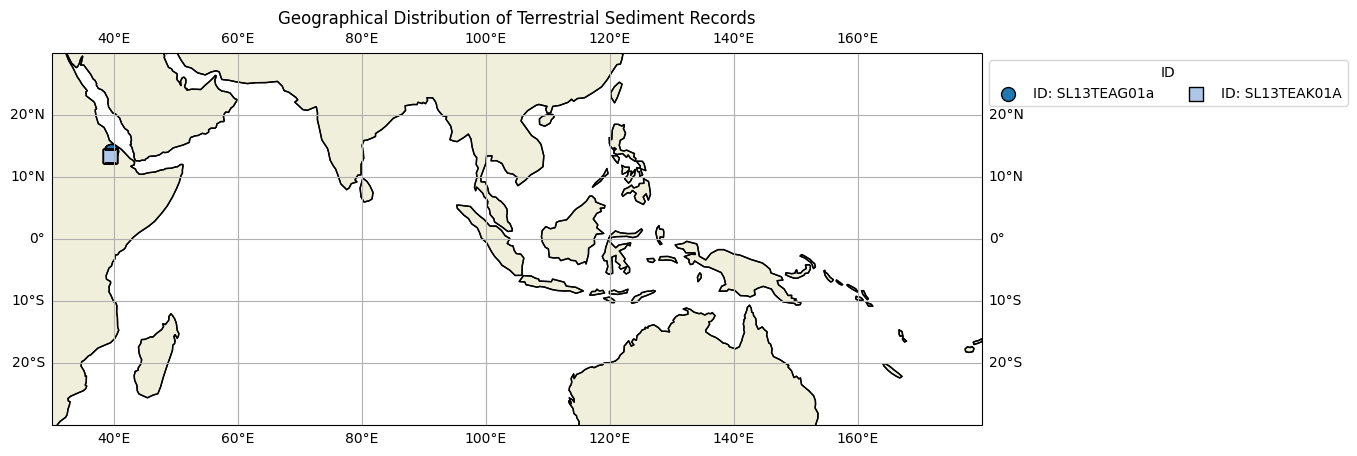

In [ ]:
def plot_terrestrial_sediment_records(df, lat_min, lat_max, lon_min, lon_max):
    # Filter only Terrestrial Sediment records
    ts_df = df[df['archiveType'] == 'TerrestrialSediment']

    if ts_df.empty:
        print("No terrestrial sediment records found in the dataset.")
        return

    # Group by VariableName (e.g., d2H, d18O, etc.)
    variable_groups = ts_df.groupby('VariableName')

    # Color and marker assignments
    unique_ids = ts_df['ID'].unique()
    color_palette = sns.color_palette("tab20", len(unique_ids))
    markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']
    id_to_color = {uid: color_palette[i % len(color_palette)] for i, uid in enumerate(unique_ids)}
    id_to_marker = {uid: markers[i % len(markers)] for i, uid in enumerate(unique_ids)}

    for variable, group in variable_groups:
        plt.figure(figsize=(12, 5))

        for uid in group['ID'].unique():
            ts_data = group[group['ID'] == uid]
            plt.plot(
                ts_data['Year'],
                ts_data['Value'],
                label=f"ID: {uid}",
                color=id_to_color[uid],
                marker=id_to_marker[uid],
                markersize=5,
                linestyle='-',
                markevery=10
            )

        y_min, y_max = group['Value'].min(), group['Value'].max()
        padding = (y_max - y_min) * 0.1
        plt.ylim(y_min - padding, y_max + padding)

        plt.title(f"Time Series for Terrestrial Sediment (δ²H)", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel(f"δ²H (‰)", fontsize=12)
        plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot map
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True)

    for uid in unique_ids:
        record = ts_df[ts_df['ID'] == uid]
        ax.scatter(
            record['Longitude'],
            record['Latitude'],
            color=id_to_color[uid],
            marker=id_to_marker[uid],
            edgecolor='black',
            s=100,
            transform=ccrs.PlateCarree(),
            label=f"ID: {uid}"
        )

    plt.title("Geographical Distribution of Terrestrial Sediment Records")
    plt.legend(title="ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
    plt.show()

plot_terrestrial_sediment_records(filtered_df, lat_min=-30, lat_max=30, lon_min=30, lon_max=180)

## CoralHydro2k

In [ ]:
# Load the CoralHydro2k data
with open("CoralHydro2k_Python.pkl", "rb") as file:
    proxies_all = pickle.load(file)["D"]

# Extract time series
all_TS = lipd.extractTs(proxies_all)

# Filter for coral δ¹⁸O records
filtered_TS = lipd.filterTs(all_TS, "paleoData_variableName == d18O_sw")

# Filter time series based on latitude and longitude for the Indo-Pacific region
coral_swd18o_TS = [
    ts for ts in filtered_TS
    if 30 <= ts.get("geo_meanLon", 0) <= 180 and -30 <= ts.get("geo_meanLat", 0) <= 30
]

# Print the total number of filtered records
print(f"Total records in Indo-Pacific region: {len(coral_swd18o_TS)}")

# Example: Print metadata for the first record
if coral_swd18o_TS:
    first_record = coral_swd18o_TS[0]
    print("\nMetadata for the first record in the Indo-Pacific region:")
    for key, value in first_record.items():
        print(f"{key}: {value}")
else:
    print("No records found in the specified region.")


extracting paleoData...
extracting: KA17RYU01
extracting: CH18YOA02
extracting: FL17DTO02
extracting: BO14HTI01
extracting: AB20MEN01
extracting: DR99ABR01
extracting: OS13NLP01
extracting: ZI04IFR01
extracting: CH18YOA01
extracting: FL17DTO01
extracting: SA16CLA01
extracting: AB20MEN03
extracting: TU01DEP01
extracting: BO14HTI02
extracting: AB20MEN02
extracting: CO00MAL01
extracting: SW98STP01
extracting: AB20MEN06
extracting: AB08MEN01
extracting: RE18CAY01
extracting: HE13MIS02
extracting: CA13SAP01
extracting: MO06PED01
extracting: AB20MEN07
extracting: DR00NBB01
extracting: ZI16ROD01
extracting: DR00KSB01
extracting: ZI15MER01
extracting: NU09KIR01
extracting: KU00NIN01
extracting: PF19LAR01
extracting: AB20MEN05
extracting: HE13MIS01
extracting: HE10GUA01
extracting: EV18ROC01
extracting: AB20MEN04
extracting: CA07FLI01
extracting: SH92PUN01
extracting: ZI16ROD02
extracting: RA20TAI01
extracting: CH03BUN01
extracting: MU18RED02
extracting: TU01LAI01
extracting: NU11PAL01
extracti

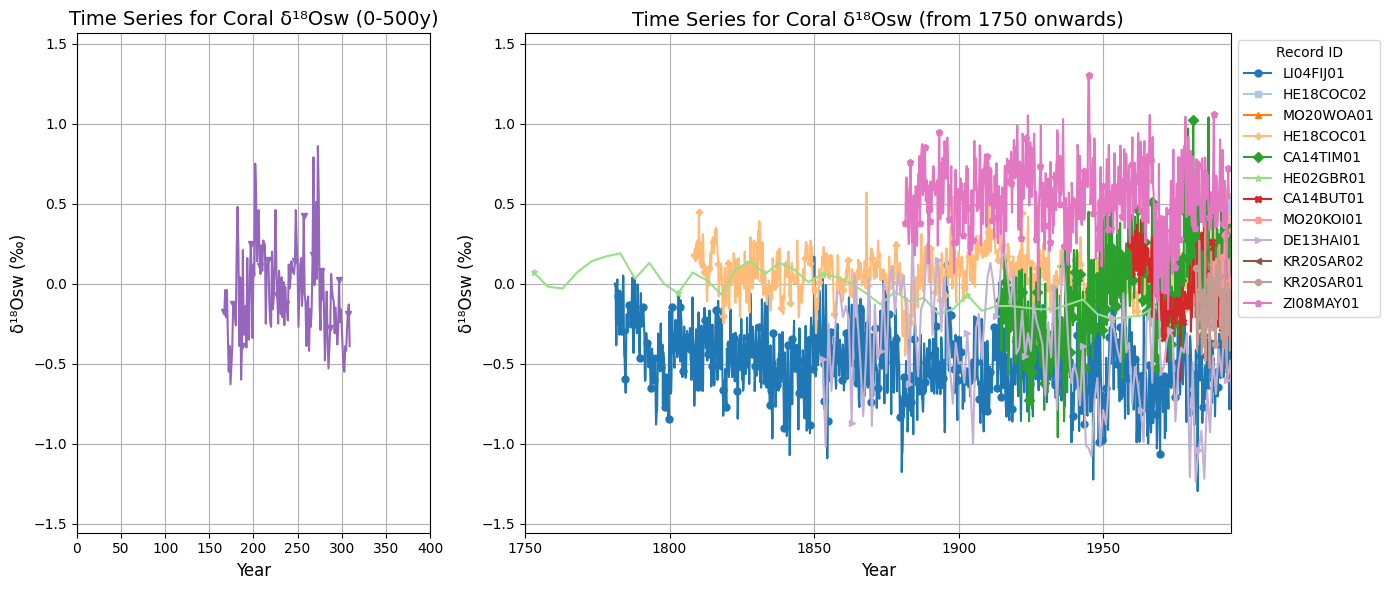

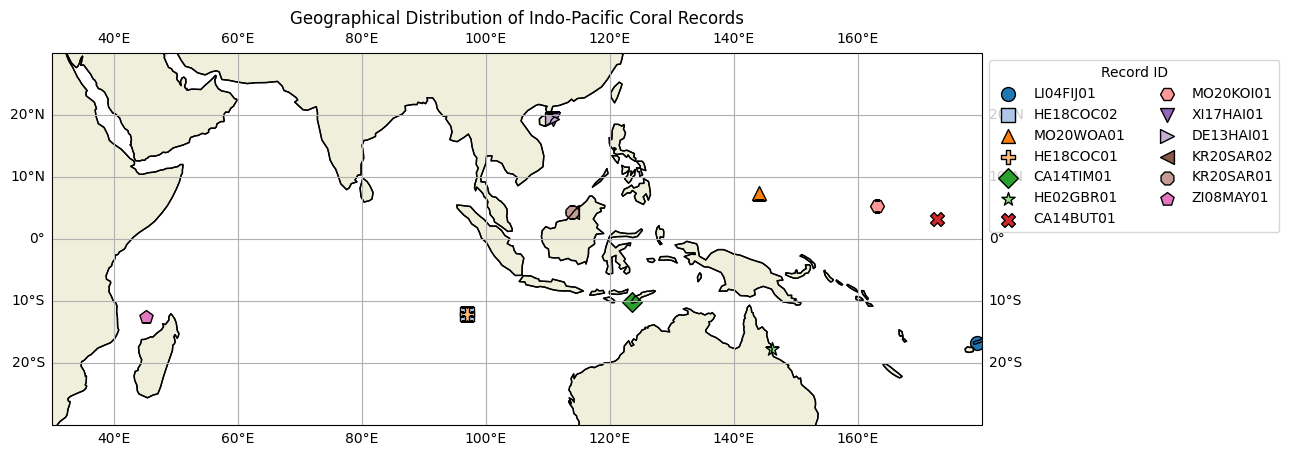

In [ ]:
# Define a set of unique markers for differentiation
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'H', 'v', '>', '<', '8', 'p']

# Define a color palette
color_palette = sns.color_palette("tab20", len(coral_swd18o_TS))

# Assign unique colors and markers to each record based on 'dataSetName' or 'ID'
id_to_color = {record['dataSetName']: color_palette[i % len(color_palette)] for i, record in enumerate(coral_swd18o_TS)}
id_to_marker = {record['dataSetName']: markers[i % len(markers)] for i, record in enumerate(coral_swd18o_TS)}


# Initialize lists for min/max values to ensure consistent y-axis
all_min_values = []
all_max_values = []

# Create figure and subplots for time series
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True, gridspec_kw={'width_ratios': [1, 2]})

# Loop through the records and plot in the appropriate subplot
for i, record in enumerate(coral_swd18o_TS):
    years = record.get('year', [])
    values = record.get('paleoData_values', [])
    label = record.get('dataSetName', f"Record {i+1}")

    if not years or not values:
        continue

    try:
        years = np.array(years, dtype=float)
        values = np.array(values, dtype=float)
    except ValueError:
        print(f"Skipping record {label} due to non-numeric values.")
        continue

    # Store min/max values for y-axis consistency
    all_min_values.append(np.nanmin(values))
    all_max_values.append(np.nanmax(values))

    # Get assigned color and marker
    color = id_to_color[record['dataSetName']]
    marker = id_to_marker[record['dataSetName']]


    # Split into two subplots
    mask1 = years <= 400
    mask2 = years >= 1750

    if np.any(mask1):
        axes[0].plot(years[mask1], values[mask1], label=label, color=color, marker=marker,
                     markersize=5, linestyle='-', markevery=10)
    if np.any(mask2):
        axes[1].plot(years[mask2], values[mask2], label=label, color=color, marker=marker,
                     markersize=5, linestyle='-', markevery=10)

# Set y-axis limits based on the collected min/max values
y_min = min(all_min_values)
y_max = max(all_max_values)
y_range = y_max - y_min
padding = 0.1 * y_range

axes[0].set_ylim(y_min - padding, y_max + padding)
axes[1].set_ylim(y_min - padding, y_max + padding)

# Titles and labels
axes[0].set_title("Time Series for Coral δ¹⁸Osw (0-500y)", fontsize=14)
axes[1].set_title("Time Series for Coral δ¹⁸Osw (from 1750 onwards)", fontsize=14)

for ax in axes:
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("δ¹⁸Osw (‰)", fontsize=12)
    ax.grid(True)

# Remove empty x-ticks on the break
axes[0].set_xlim(0, 400)
axes[1].set_xlim(1750, max(years))
axes[1].tick_params(labelleft=True)

# Legend on the right
axes[1].legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to reduce space
plt.tight_layout()
plt.show()

# --- Map Plot ---
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([30, 180, -30, 30], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# Extract latitudes and longitudes
lats = [ts.get("geo_meanLat") for ts in coral_swd18o_TS]
lons = [ts.get("geo_meanLon") for ts in coral_swd18o_TS]

# Plot points with the same color and marker used in time series
for i, record in enumerate(coral_swd18o_TS):
    label = record.get('dataSetName', f"Record {i+1}")
    color = id_to_color[record['dataSetName']]
    marker = id_to_marker[record['dataSetName']]


    ax.scatter(
        record["geo_meanLon"], record["geo_meanLat"],
        color=color, marker=marker,
        edgecolor="black", s=100,
        transform=ccrs.PlateCarree(),
        label=label
    )

plt.title("Geographical Distribution of Indo-Pacific Coral Records")
plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

coral_swd18o_records = []

for record in coral_swd18o_TS:
    if 'paleoData_values' in record and 'year' in record:
        df_record = pd.DataFrame({
            "Year": record['year'],
            "Value": record['paleoData_values'],
            "Longitude": record.get('geo_meanLon', np.nan),
            "Latitude": record.get('geo_meanLat', np.nan),
            "archiveType": record.get('archiveType', 'Unknown'),
            "ID": record.get('dataSetName', 'Unknown'),
            "VariableName": record.get('paleoData_variableName', 'Unknown')
        })

        coral_swd18o_records.append(df_record)

coral_swd18o_df = pd.concat(coral_swd18o_records, ignore_index=True)
coral_swd18o_df['Value'] = pd.to_numeric(coral_swd18o_df['Value'], errors='coerce')
coral_swd18o_df.dropna(subset=['Value'], inplace=True)
coral_swd18o_df['Year'] = pd.to_numeric(coral_swd18o_df['Year'], errors='coerce')
coral_swd18o_df.dropna(subset=['Year'], inplace=True)

coral_swd18o_df = coral_swd18o_df.sort_values(by='Year')

print(coral_swd18o_df.head())
print(f"Number of records: {coral_swd18o_df['ID'].nunique()}")

       Year  Value  Longitude  Latitude archiveType         ID VariableName
5162  167.0  -0.18    110.753    19.395       coral  XI17HAI01      d18O_sw
5163  168.0  -0.04    110.753    19.395       coral  XI17HAI01      d18O_sw
5164  169.0  -0.21    110.753    19.395       coral  XI17HAI01      d18O_sw
5165  170.0  -0.04    110.753    19.395       coral  XI17HAI01      d18O_sw
5166  171.0  -0.32    110.753    19.395       coral  XI17HAI01      d18O_sw
Number of records: 13


In [ ]:
# Filter MS09DOIP01b only
ms09_df = filtered_df[filtered_df['ID'] == 'MS09DOIP01b'].copy()

# Check how extreme the values are
ms09_df_sorted = ms09_df.sort_values(by='Value')

# Print the most negative and most positive values
print("Most negative values:")
print(ms09_df_sorted.head(5))  # show lowest values

print("\nMost positive values:")
print(ms09_df_sorted.tail(5))  # show highest values

# Check the corresponding year for the most negative outlier
outlier_row = ms09_df_sorted[ms09_df_sorted['Value'] == ms09_df_sorted['Value'].min()]
print("\nOutlier row with most negative value:")
print(outlier_row)

Most negative values:
        Year  Value     archiveType VariableName  Latitude  Longitude  \
162  1198.55  -3.10  MarineSediment         d18O     -3.53      119.2   
81   1581.84  -1.02  MarineSediment         d18O     -3.53      119.2   
95   1512.78  -0.90  MarineSediment         d18O     -3.53      119.2   
243   432.42  -0.87  MarineSediment         d18O     -3.53      119.2   
93   1520.91  -0.73  MarineSediment         d18O     -3.53      119.2   

    PrimaryTimeSeries           ID  InferredMaterial InferredMaterialGroup  \
162              TRUE  MS09DOIP01b  surface seawater         surface water   
81               TRUE  MS09DOIP01b  surface seawater         surface water   
95               TRUE  MS09DOIP01b  surface seawater         surface water   
243              TRUE  MS09DOIP01b  surface seawater         surface water   
93               TRUE  MS09DOIP01b  surface seawater         surface water   

                            VariableGroup  \
162  EffectiveMoisture, E

In [ ]:
common_columns = ['Year', 'Value', 'Longitude', 'Latitude', 'archiveType', 'ID', 'VariableName', 'Depth']

coral_swd18o_df['Depth'] = np.nan

# Filter out rows with archiveType 'Coral' or 'TerrestrialSediment' in filtered_df
filtered_df = filtered_df[~filtered_df['archiveType'].isin(['Coral', 'TerrestrialSediment'])]

# List of IDs to discard
ids_to_discard = [
    'MS11ANMN01a', 'MS09DOIP01a', 'MS11ANMS01a', 'MS07LSSP01a',
    'MS10BLMS01a', 'MS14GFSS01a', 'MS07LSPG01a', 'MS13RSAS01a', 'LS09SASP01'
]

filtered_df = filtered_df[~filtered_df['ID'].isin(ids_to_discard)]

# Remove the extreme outlier from MS09DOIP01b at year 1198.55
filtered_df = filtered_df[~((filtered_df['ID'] == 'MS09DOIP01b') & (filtered_df['Year'] == 1198.55))]

# Concatenate vertically
merged_df = pd.concat([coral_swd18o_df[common_columns], filtered_df[common_columns]], ignore_index=True)
merged_df['Depth'] = pd.to_numeric(merged_df['Depth'], errors='coerce')

# Display the result
print(merged_df.head())
print(f"Number of records: {merged_df['ID'].nunique()}")

counts_by_archive = (
    merged_df.groupby(['archiveType'])['ID']
    .nunique()
    .reset_index(name='UniqueIDCount')
)

# Print the result
print(counts_by_archive)

    Year  Value  Longitude  Latitude archiveType         ID VariableName  \
0  167.0  -0.18    110.753    19.395       coral  XI17HAI01      d18O_sw   
1  168.0  -0.04    110.753    19.395       coral  XI17HAI01      d18O_sw   
2  169.0  -0.21    110.753    19.395       coral  XI17HAI01      d18O_sw   
3  170.0  -0.04    110.753    19.395       coral  XI17HAI01      d18O_sw   
4  171.0  -0.32    110.753    19.395       coral  XI17HAI01      d18O_sw   

   Depth  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
Number of records: 76
      archiveType  UniqueIDCount
0      GlacierIce              9
1    LakeSediment             13
2  MarineSediment             13
3      Speleothem              7
4            Wood             21
5           coral             13


In [ ]:
merged_df.describe()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20952 entries, 0 to 20951
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          20952 non-null  float64
 1   Value         20952 non-null  float64
 2   Longitude     20952 non-null  float64
 3   Latitude      20952 non-null  float64
 4   archiveType   20952 non-null  object 
 5   ID            20952 non-null  object 
 6   VariableName  20952 non-null  object 
 7   Depth         5998 non-null   float64
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [ ]:
# Assuming merged_df is your combined dataframe

# Sort by ID and Year to ensure chronological order
merged_df = merged_df.sort_values(by=['ID', 'Year'])

# Sort by ID and appropriate axis (Depth or Year)
def sort_within_group(group):
    if group['Depth'].notna().sum() > 0:
        return group.sort_values(by='Depth')  # Sort by depth (ascending)
    else:
        return group.sort_values(by='Year')   # Sort by year (ascending)

merged_df = merged_df.groupby('ID', group_keys=False).apply(sort_within_group).reset_index(drop=True)

# Group by ID and calculate thickness per record
def calculate_thickness(group):
    # Use Depth if available
    if group['Depth'].notna().sum() > 0:
        thickness = group['Depth'].diff().bfill()  # Depth-based
    else:
        thickness = group['Year'].diff().bfill()   # Year-based
    group['Thickness'] = thickness
    return group

# Apply the function to each record (ID group)
merged_df = merged_df.groupby('ID').apply(calculate_thickness).reset_index(drop=True)

# Fill any remaining NaN thickness values with a default (1 or another value you prefer)
merged_df['Thickness'] = merged_df['Thickness'].fillna(1)

# Check the output
print(merged_df.head())

       Year  Value  Longitude  Latitude archiveType         ID VariableName  \
0  1959.374   0.25      172.8       3.2       coral  CA14BUT01      d18O_sw   
1  1959.540   0.21      172.8       3.2       coral  CA14BUT01      d18O_sw   
2  1959.706   0.30      172.8       3.2       coral  CA14BUT01      d18O_sw   
3  1959.872   0.26      172.8       3.2       coral  CA14BUT01      d18O_sw   
4  1960.042   0.25      172.8       3.2       coral  CA14BUT01      d18O_sw   

   Depth  Thickness  
0    NaN      0.166  
1    NaN      0.166  
2    NaN      0.166  
3    NaN      0.166  
4    NaN      0.170  


<ipython-input-24-2e31ceded91c>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = merged_df.groupby('ID', group_keys=False).apply(sort_within_group).reset_index(drop=True)
<ipython-input-24-2e31ceded91c>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = merged_df.groupby('ID').apply(calculate_thickness).reset_index(drop=True)


In [ ]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Calculate average resolution based on Year differences
def compute_resolution(group):
    group = group.sort_values('Year')
    year_diffs = group['Year'].diff().dropna()  # Skip the first NaN from diff
    avg_resolution = year_diffs.mean()
    return pd.Series({'Average_Resolution': avg_resolution})

# Apply to each ID group
resolution_df = merged_df.groupby('ID').apply(compute_resolution).reset_index()

# Optional: round to 2 decimal places
resolution_df['Average_Resolution'] = resolution_df['Average_Resolution'].round(2)

# Display result
print(resolution_df)


             ID  Average_Resolution
0     CA14BUT01                0.17
1     CA14TIM01                0.08
2     DE13HAI01                1.00
3     HE02GBR01                5.12
4     HE18COC01                0.17
5     HE18COC02                0.17
6   IC00THDS03A                1.00
7   IC00THDS03B                9.97
8   IC02THKI02A               10.58
9   IC02THKI03A               10.00
10  IC02THKI04A               10.07
11  IC02THKI05A               10.00
12  IC03HORB01A                0.08
13  IC07KARB01A                5.00
14  IC15GANK01A                1.00
15    KR20SAR01                0.08
16    KR20SAR02                0.08
17    LI04FIJ01                0.12
18   LS06CRLA01               32.18
19   LS07LAHA01               16.75
20  LS08LICA01a               21.25
21   LS09MAAS01               42.16
22   LS11BACH01              108.07
23   LS11KOMA01              184.67
24   LS11RYKA01               28.92
25   LS11TICH01               40.67
26   LS13KOLA01             

<ipython-input-30-c40a0fe694cb>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resolution_df = merged_df.groupby('ID').apply(compute_resolution).reset_index()


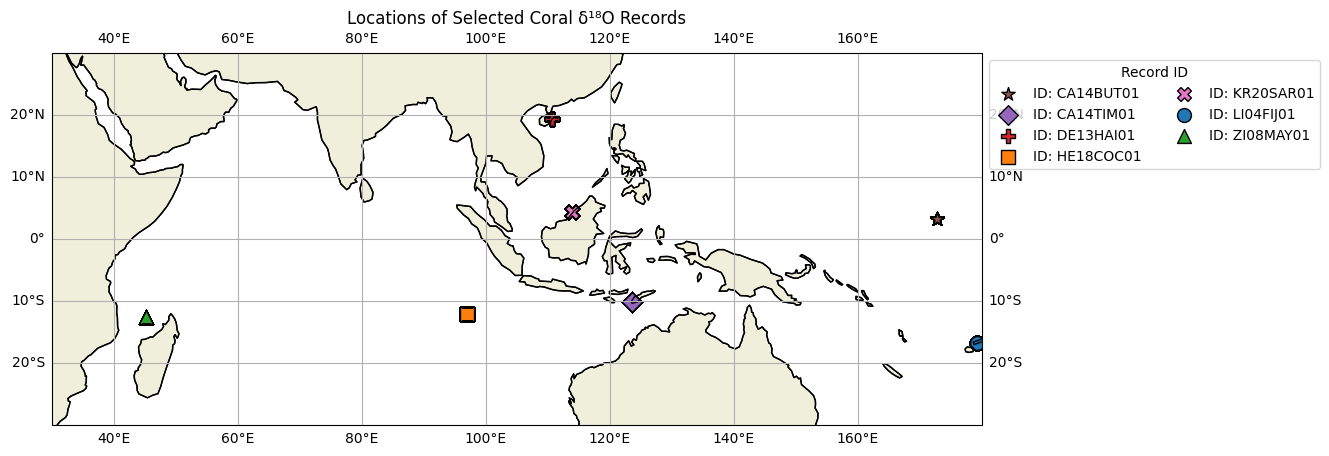

In [ ]:
# Filter merged_df for relevant IDs
ids_to_plot = ['LI04FIJ01', 'HE18COC01', 'ZI08MAY01', 'DE13HAI01', 'CA14TIM01', 'CA14BUT01', 'KR20SAR01']
valid_coral_annual_df = merged_df[merged_df['ID'].isin(ids_to_plot)]

# Fixed extent as specified
lon_min, lon_max = 30, 180
lat_min, lat_max = -30, 30

# Define markers and colors
markers = ['o', 's', '^', 'P', 'D', '*', 'X']
colors = plt.cm.tab10.colors  # 10 color palette

# Assign colors and markers to each ID
id_to_color = {id_: colors[i % len(colors)] for i, id_ in enumerate(ids_to_plot)}
id_to_marker = {id_: markers[i % len(markers)] for i, id_ in enumerate(ids_to_plot)}

# Plot the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# Plot each unique ID's location(s)
for unique_id in valid_coral_annual_df['ID'].unique():
    archive_data = valid_coral_annual_df[valid_coral_annual_df['ID'] == unique_id]

    ax.scatter(
        archive_data['Longitude'],
        archive_data['Latitude'],
        color=id_to_color[unique_id],
        marker=id_to_marker[unique_id],
        edgecolor="black",
        s=100,
        transform=ccrs.PlateCarree(),
        label=f"ID: {unique_id}"
    )

# Title and legend
plt.title("Locations of Selected Coral δ¹⁸O Records")
plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()


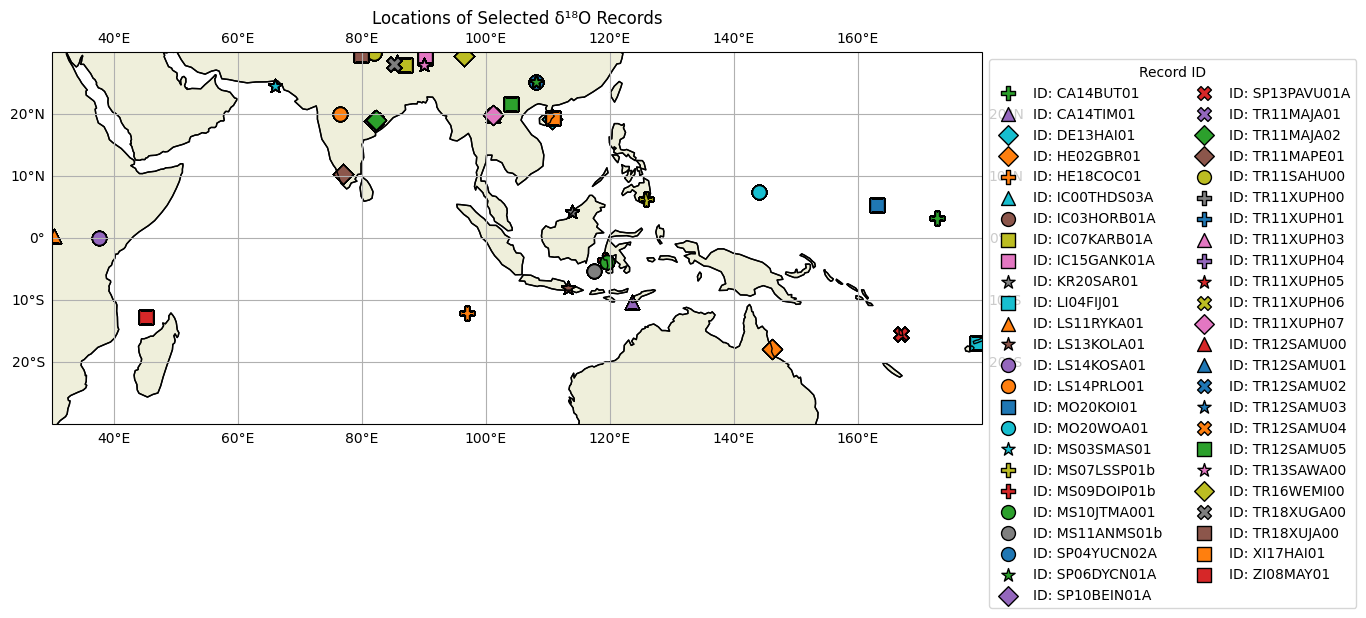

In [ ]:
 # Filter merged_df for relevant IDs
ids_to_plot = [
    'SP04YUCN02A', 'XI17HAI01', 'MS09DOIP01a', 'MS09DOIP01b', 'SP10BEIN01A',
    'LS13KOLA01', 'MS11ANMS01a', 'MS11ANMS01b', 'IC07KARB01A', 'IC00THDS03A',
    'TR11XUPH01', 'HE02GBR01', 'SP06DYCN01A', 'SP13PAVU01A', 'LS14KOSA01',
    'TR18XUJA00', 'TR11XUPH03', 'TR11XUPH00', 'TR16WEMI00', 'MS03SMAS01',
    'TR12SAMU02', 'LS14PRLO01', 'TR12SAMU05', 'TR12SAMU00', 'TR11XUPH04',
    'TR11MAPE01', 'TR13SAWA00', 'TR18XUGA00', 'TR11SAHU00', 'LI04FIJ01',
    'TR12SAMU01', 'HE18COC01', 'TR11MAJA02', 'TR11XUPH05', 'TR11MAJA01',
    'IC03HORB01A', 'IC15GANK01A', 'MS07LSSP01a', 'MS07LSSP01b', 'DE13HAI01',
    'TR12SAMU03', 'TR12SAMU04', 'MS10JTMA001', 'ZI08MAY01', 'CA14TIM01',
    'LS09SASP01', 'TR11XUPH07', 'KR20SAR01', 'TR11XUPH06', 'MO20WOA01',
    'MO20KOI01', 'LS11RYKA01', 'CA14BUT01'
]

valid_all_df = merged_df[merged_df['ID'].isin(ids_to_plot)]

# Fixed extent as specified
lon_min, lon_max = 30, 180
lat_min, lat_max = -30, 30

# Define markers and colors
markers = ['o', 's', '^', 'P', 'D', '*', 'X']
colors = plt.cm.tab10.colors  # 10 color palette

# Assign colors and markers to each ID
id_to_color = {id_: colors[i % len(colors)] for i, id_ in enumerate(ids_to_plot)}
id_to_marker = {id_: markers[i % len(markers)] for i, id_ in enumerate(ids_to_plot)}

# Plot the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# Plot each unique ID's location(s)
for unique_id in valid_all_df['ID'].unique():
    archive_data = valid_all_df[valid_all_df['ID'] == unique_id]

    ax.scatter(
        archive_data['Longitude'],
        archive_data['Latitude'],
        color=id_to_color[unique_id],
        marker=id_to_marker[unique_id],
        edgecolor="black",
        s=100,
        transform=ccrs.PlateCarree(),
        label=f"ID: {unique_id}"
    )

# Title and legend
plt.title("Locations of Selected δ¹⁸O Records")
plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

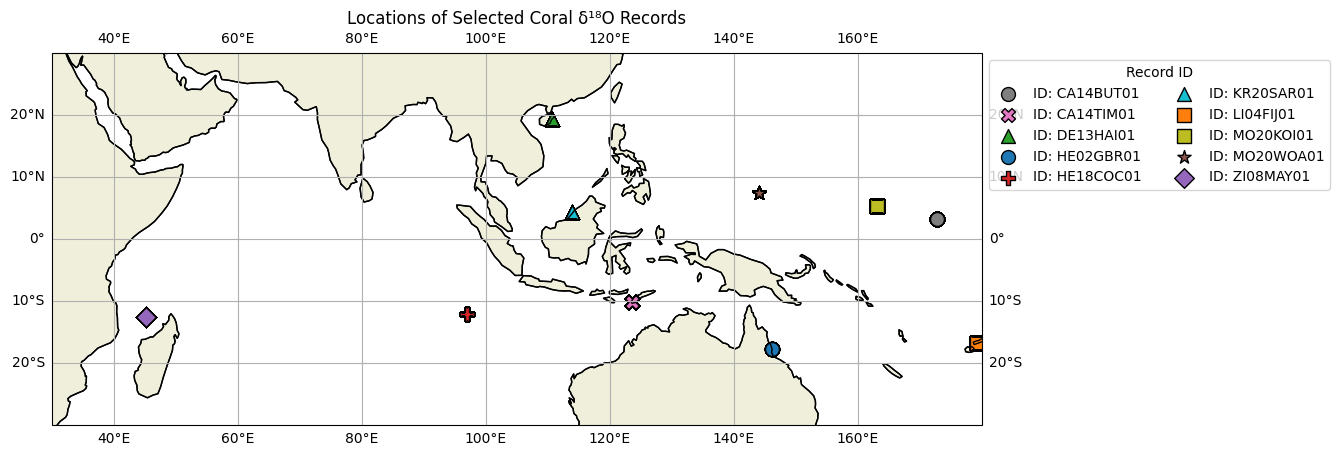

In [ ]:
# Filter merged_df for relevant IDs
ids_to_plot = ['HE02GBR01', 'LI04FIJ01', 'DE13HAI01', 'HE18COC01', 'ZI08MAY01', 'MO20WOA01', 'CA14TIM01', 'CA14BUT01', 'MO20KOI01', 'KR20SAR01']
valid_coral_5y_df = merged_df[merged_df['ID'].isin(ids_to_plot)]

# Fixed extent as specified
lon_min, lon_max = 30, 180
lat_min, lat_max = -30, 30

# Define markers and colors
markers = ['o', 's', '^', 'P', 'D', '*', 'X']
colors = plt.cm.tab10.colors  # 10 color palette

# Assign colors and markers to each ID
id_to_color = {id_: colors[i % len(colors)] for i, id_ in enumerate(ids_to_plot)}
id_to_marker = {id_: markers[i % len(markers)] for i, id_ in enumerate(ids_to_plot)}

# Plot the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# Plot each unique ID's location(s)
for unique_id in valid_coral_5y_df['ID'].unique():
    archive_data = valid_coral_5y_df[valid_coral_5y_df['ID'] == unique_id]

    ax.scatter(
        archive_data['Longitude'],
        archive_data['Latitude'],
        color=id_to_color[unique_id],
        marker=id_to_marker[unique_id],
        edgecolor="black",
        s=100,
        transform=ccrs.PlateCarree(),
        label=f"ID: {unique_id}"
    )

# Title and legend
plt.title("Locations of Selected Coral δ¹⁸O Records")
plt.legend(title="Record ID", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()
